# quickly draw a coincidence spectrum

In [1]:
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python'); 
from PETsys_analysis_tools import *;
from scipy.stats import gaussian_kde

%config InlineBackend.figure_format = 'retina'

In [2]:
main_figures_path = '/Users/erezcohen/Desktop/PETsys/write-ups/Prototype1/Figures/'

## ADC to energy calibration 

detected events in the following channels:  [482 533]
in channel  482 ,peaks at bins number [ 15  49 120]
peaks2use: [ 49 120] Q_au: [19.46308725 47.10067114]
in channel  533 ,peaks at bins number [ 15  46 115]
peaks2use: [ 46 115] Q_au: [18.29530201 45.15436242]
calibration polynomial for channel 482 :  
27.63 x - 26.68
calibration polynomial for channel 533 :  
28.43 x - 9.065


PETsys_analysis_tools.py:63: RuntimeWarning: invalid value encountered in power
  linearisedQ = P0*(np.power(P1, np.power(Q,P2))) + P3*Q - P0
PETsys_analysis_tools.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Na22singles[ch]['Energy [keV]'] = Epoly[channels[0]](Na22singles[ch].charge)


saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1/Figures/p1_22Na_singles_EdepCalibrated.pdf


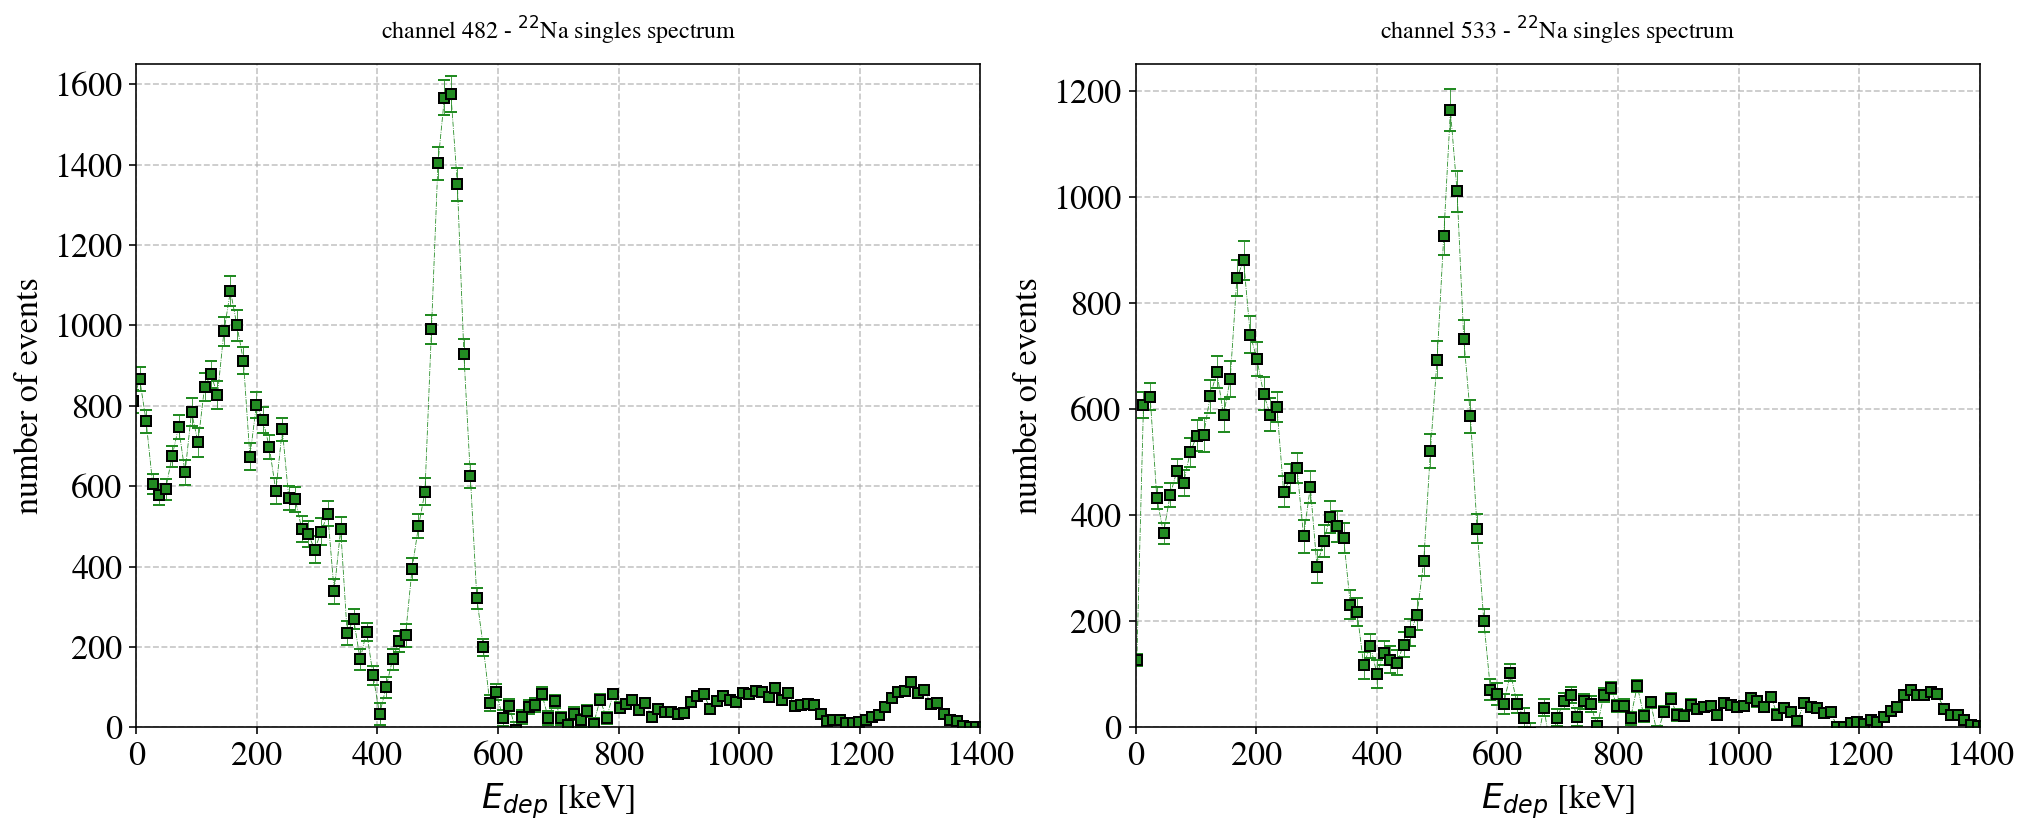

In [3]:
Epoly,x_keV,axes = calibrate_charge_2_keV_using_Na22_data(bins=np.linspace(0,58,150))
axes[482].set_xlim(0,1400); axes[482].set_ylim(0,1650); axes[482].set_title('channel 482 - $^{22}$Na singles spectrum')
axes[533].set_xlim(0,1400); axes[533].set_ylim(0,1250); axes[533].set_title('channel 533 - $^{22}$Na singles spectrum')
save_figure(filename = main_figures_path + 'p1_22Na_singles_EdepCalibrated.pdf')

# $^{22}$Na
/Users/erezcohen/Desktop/data/PETsys/Prototype1/Na22_source_0.8uC_3Dec2020/LYSO_source_0mm_950sec_coinc.dat

## two detectors on both sides and 1 mm away from source

In [34]:
# dT = 4100
# filename = '/Users/erezcohen/Desktop/data/PETsys/Prototype1/Cf252_source_1uC_3Dec2020/Cf252_4100sec_coinc.dat'
dT = 11060
filename = '/Users/erezcohen/Desktop/data/PETsys/Prototype1/Na22_source_0.8uC_3Dec2020/Na22_ScintSourceDistance_1mm_%dsec_coinc.dat'%dT

In [35]:
coinc_data = pd.read_csv(filename,delimiter='\t',names=['mh-n1','mh-j1','t1','Q1','ch1','mh-n2','mh-j2','t2','Q2','ch2'])

33500 events in coincidence window and Edep limits
28587 events fitting to Gaussian
mu: -600.9799559240214 ,sigma: 771.2946325526028
saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1/Figures/p1_22Na_coincidence_noADCcut.pdf


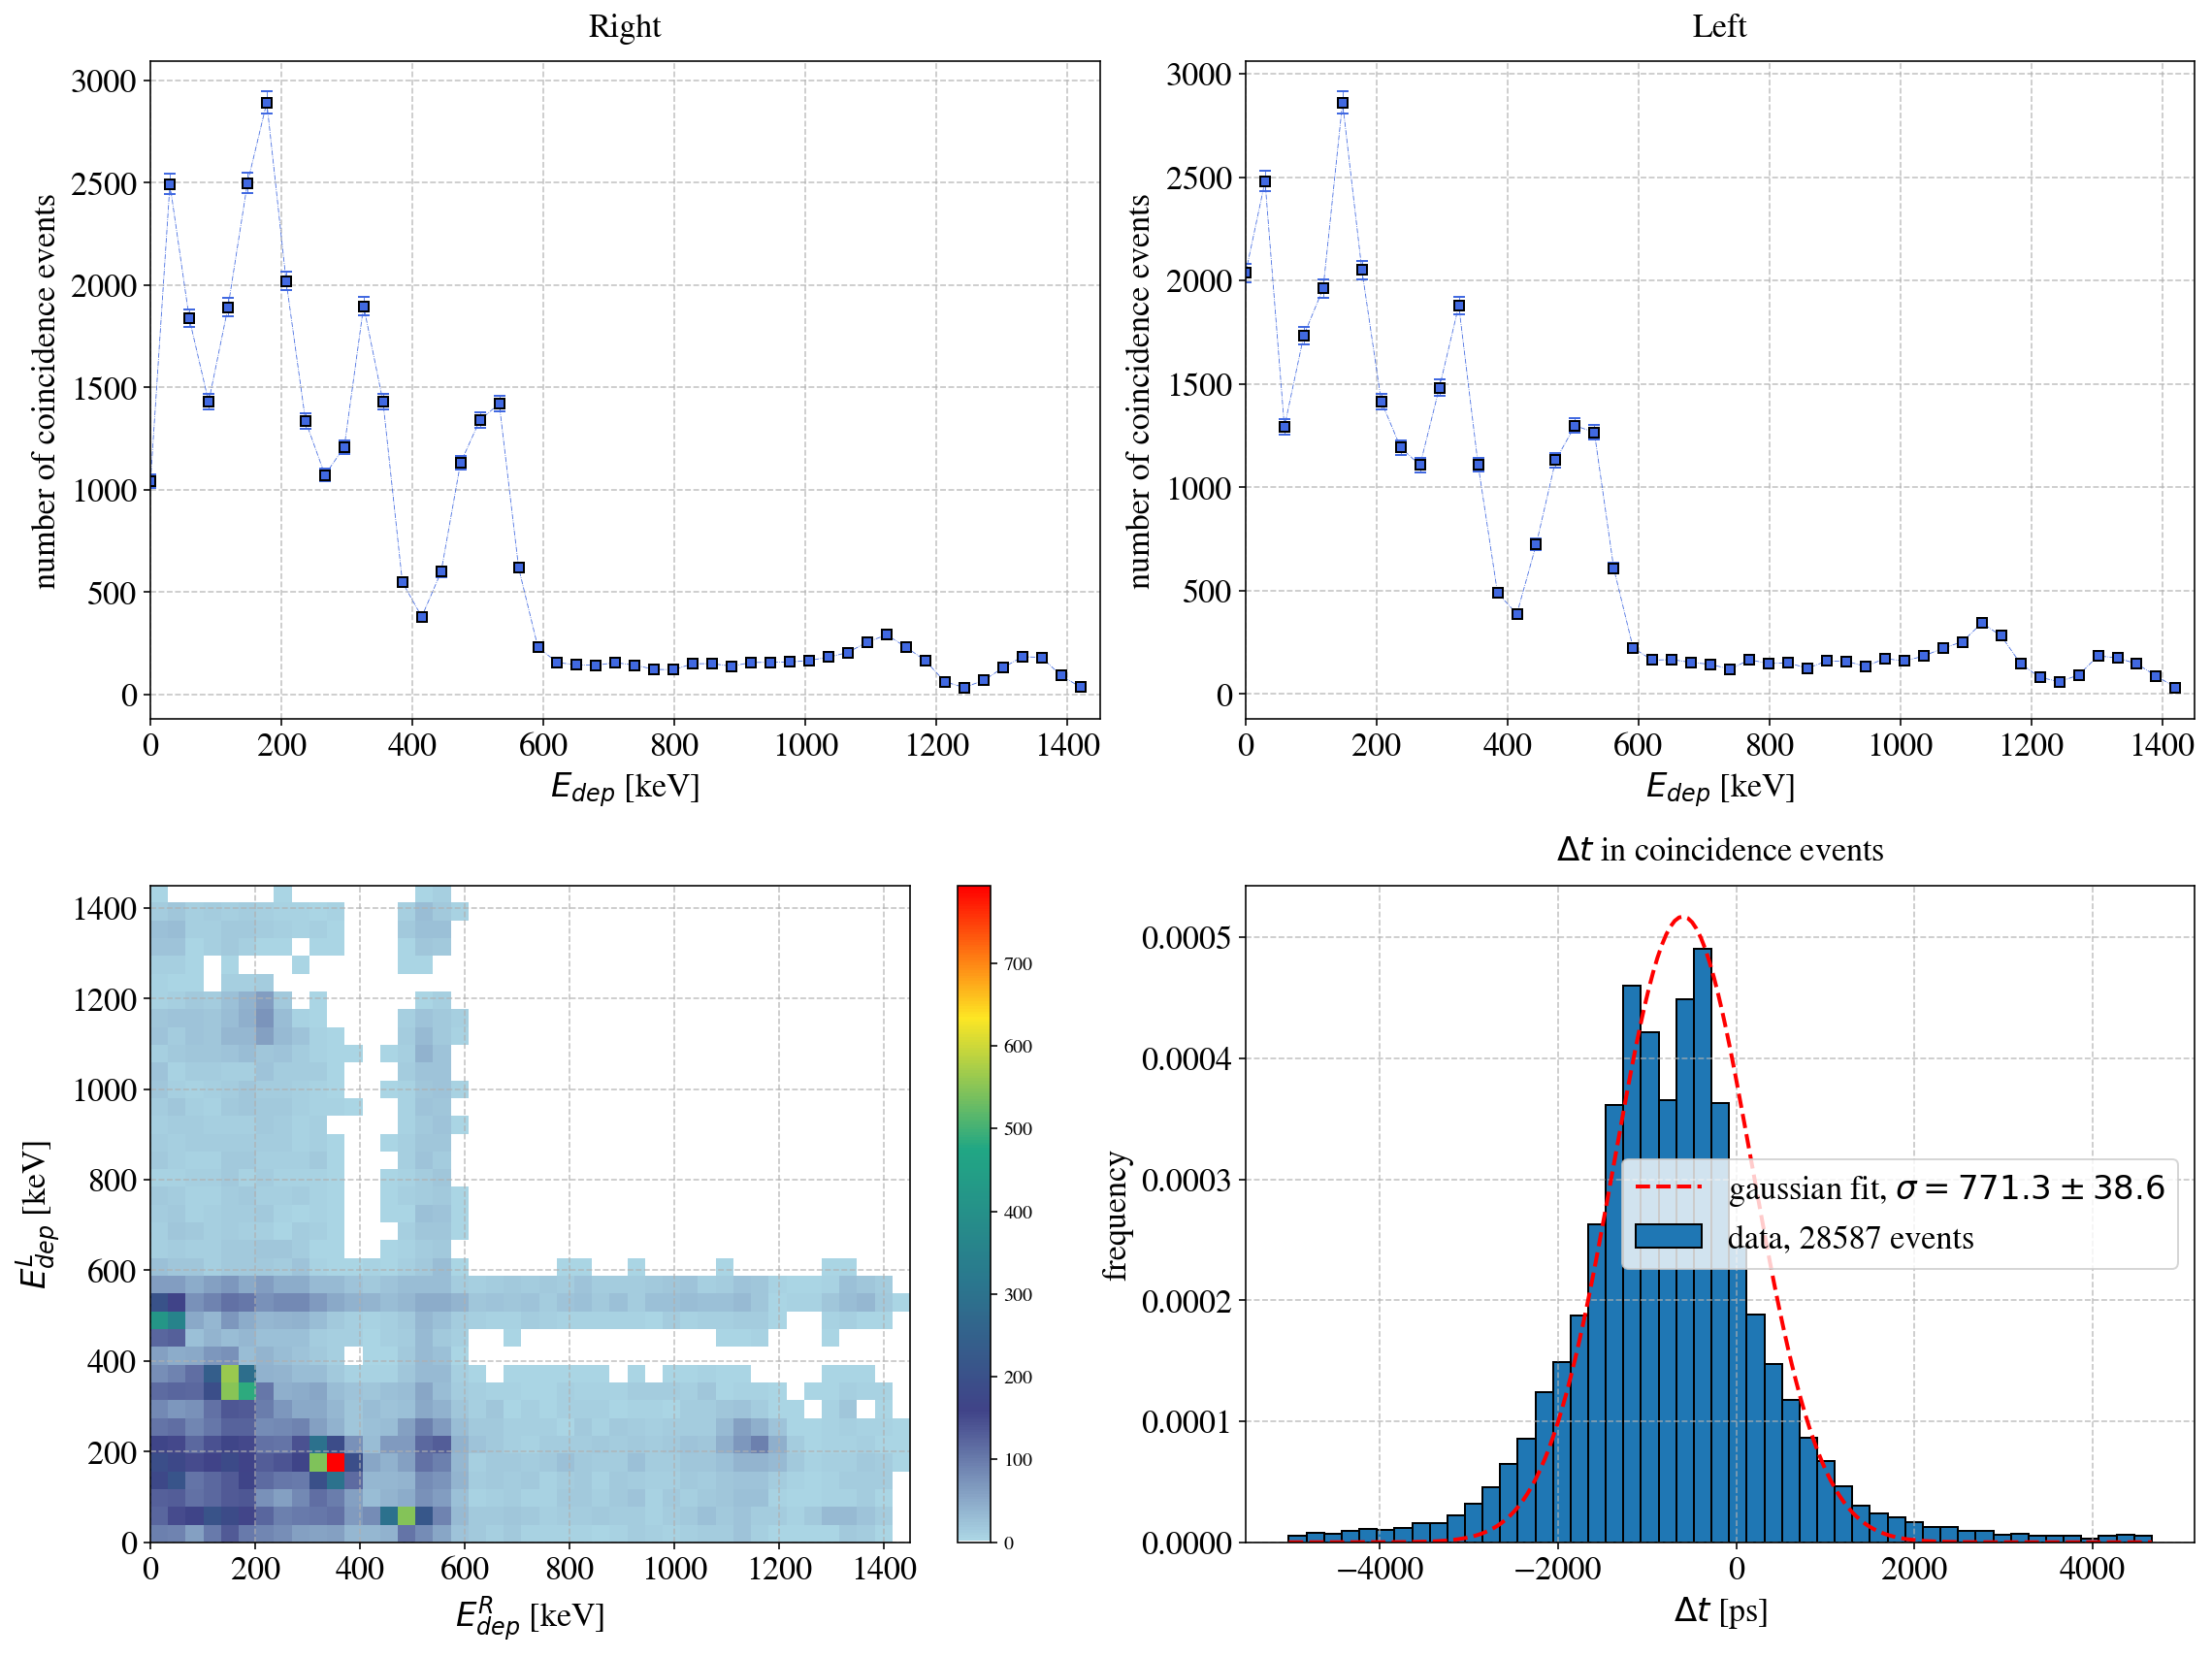

In [36]:
time_difference_in_2SiPM_coincidence_measurement(coinc_data=coinc_data,Epoly=Epoly,
                                                 bins=np.linspace(0,1450,50),Edeplims_keV=None)
save_figure(filename = main_figures_path + 'p1_22Na_coincidence_noADCcut.pdf')

467 events in coincidence window and Edep limits
379 events fitting to Gaussian
mu: -695.4828496042217 ,sigma: 383.2032901466464
saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1/Figures/p1_22Na_coincidence_ADCcut_511photopeak_both_sides.pdf


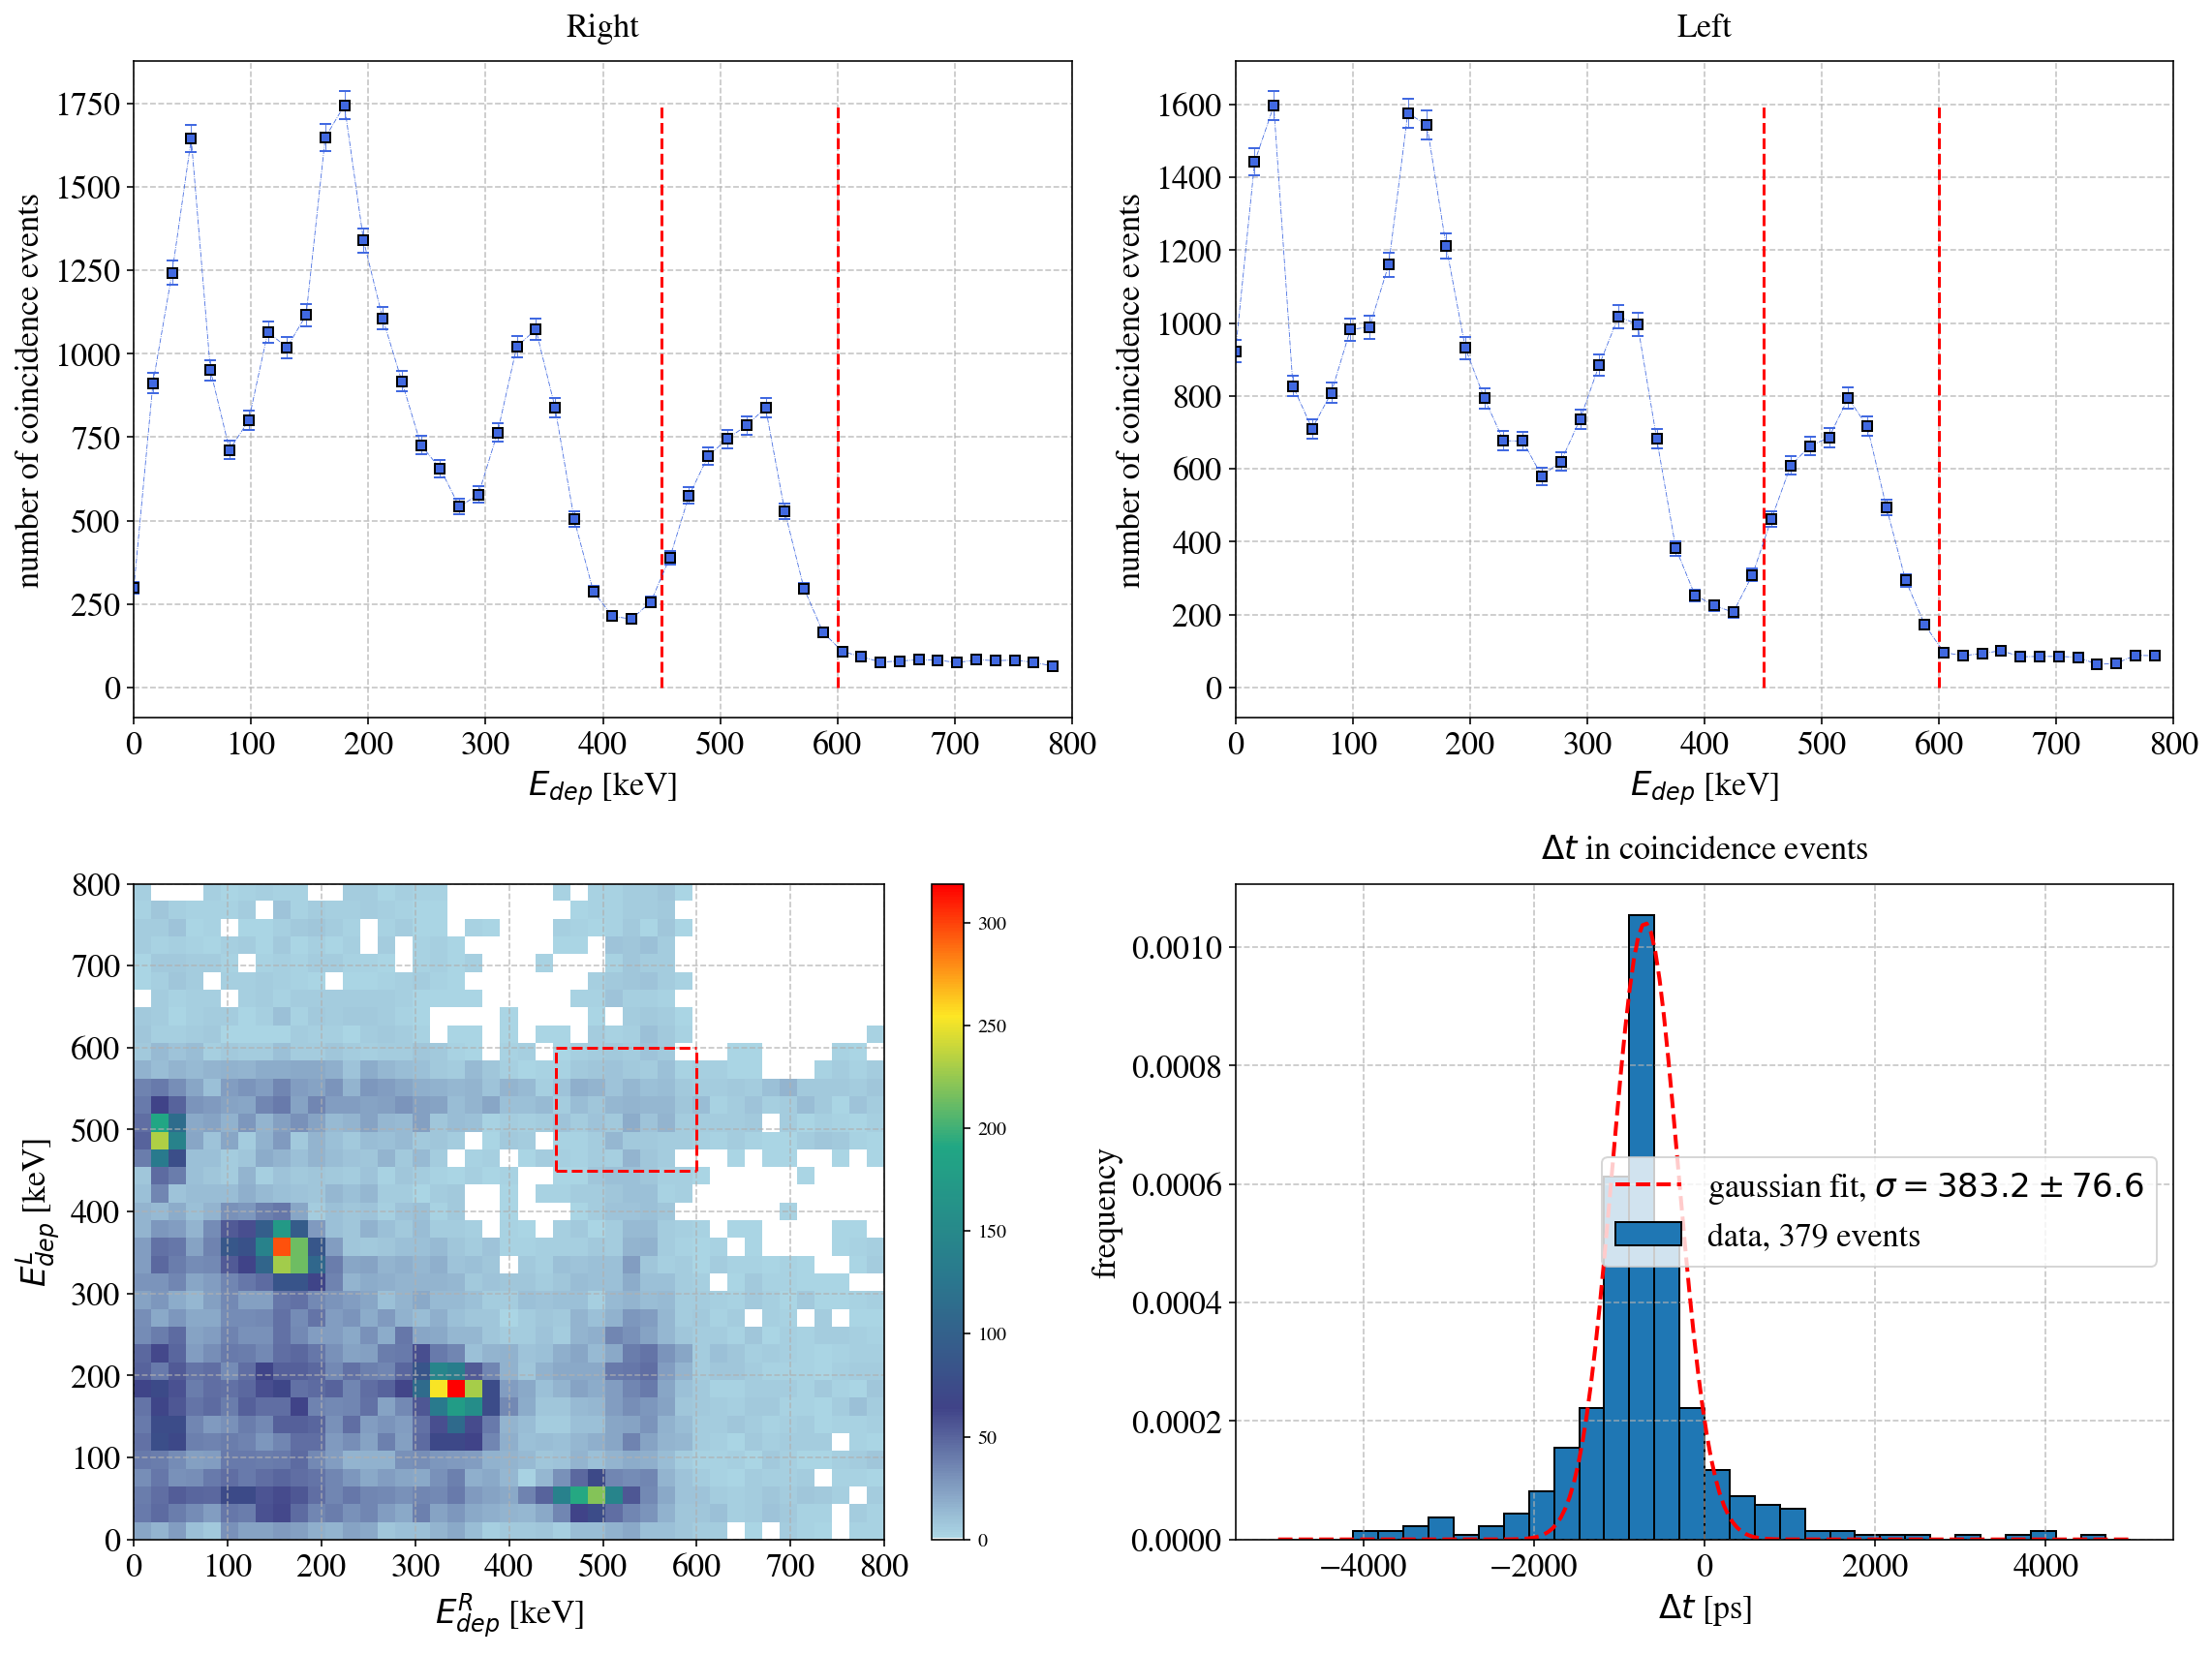

In [37]:
time_difference_in_2SiPM_coincidence_measurement(coinc_data=coinc_data,bins=np.linspace(0,800,50),Epoly=Epoly,
                                                 Edeplims_keV=(450,600),dt_lims=(-1.5e3,0.5e3),
                                                 dt_bins=np.linspace(-5e3,5e3,35))
save_figure(filename = main_figures_path + 'p1_22Na_coincidence_ADCcut_511photopeak_both_sides.pdf')

2624 events in coincidence window and Edep limits
2437 events fitting to Gaussian
mu: -1113.9376282314322 ,sigma: 196.1096710658411
saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1/Figures/p1_22Na_coincidence_ADCcut_RComptonEdge_LComptonBS.pdf


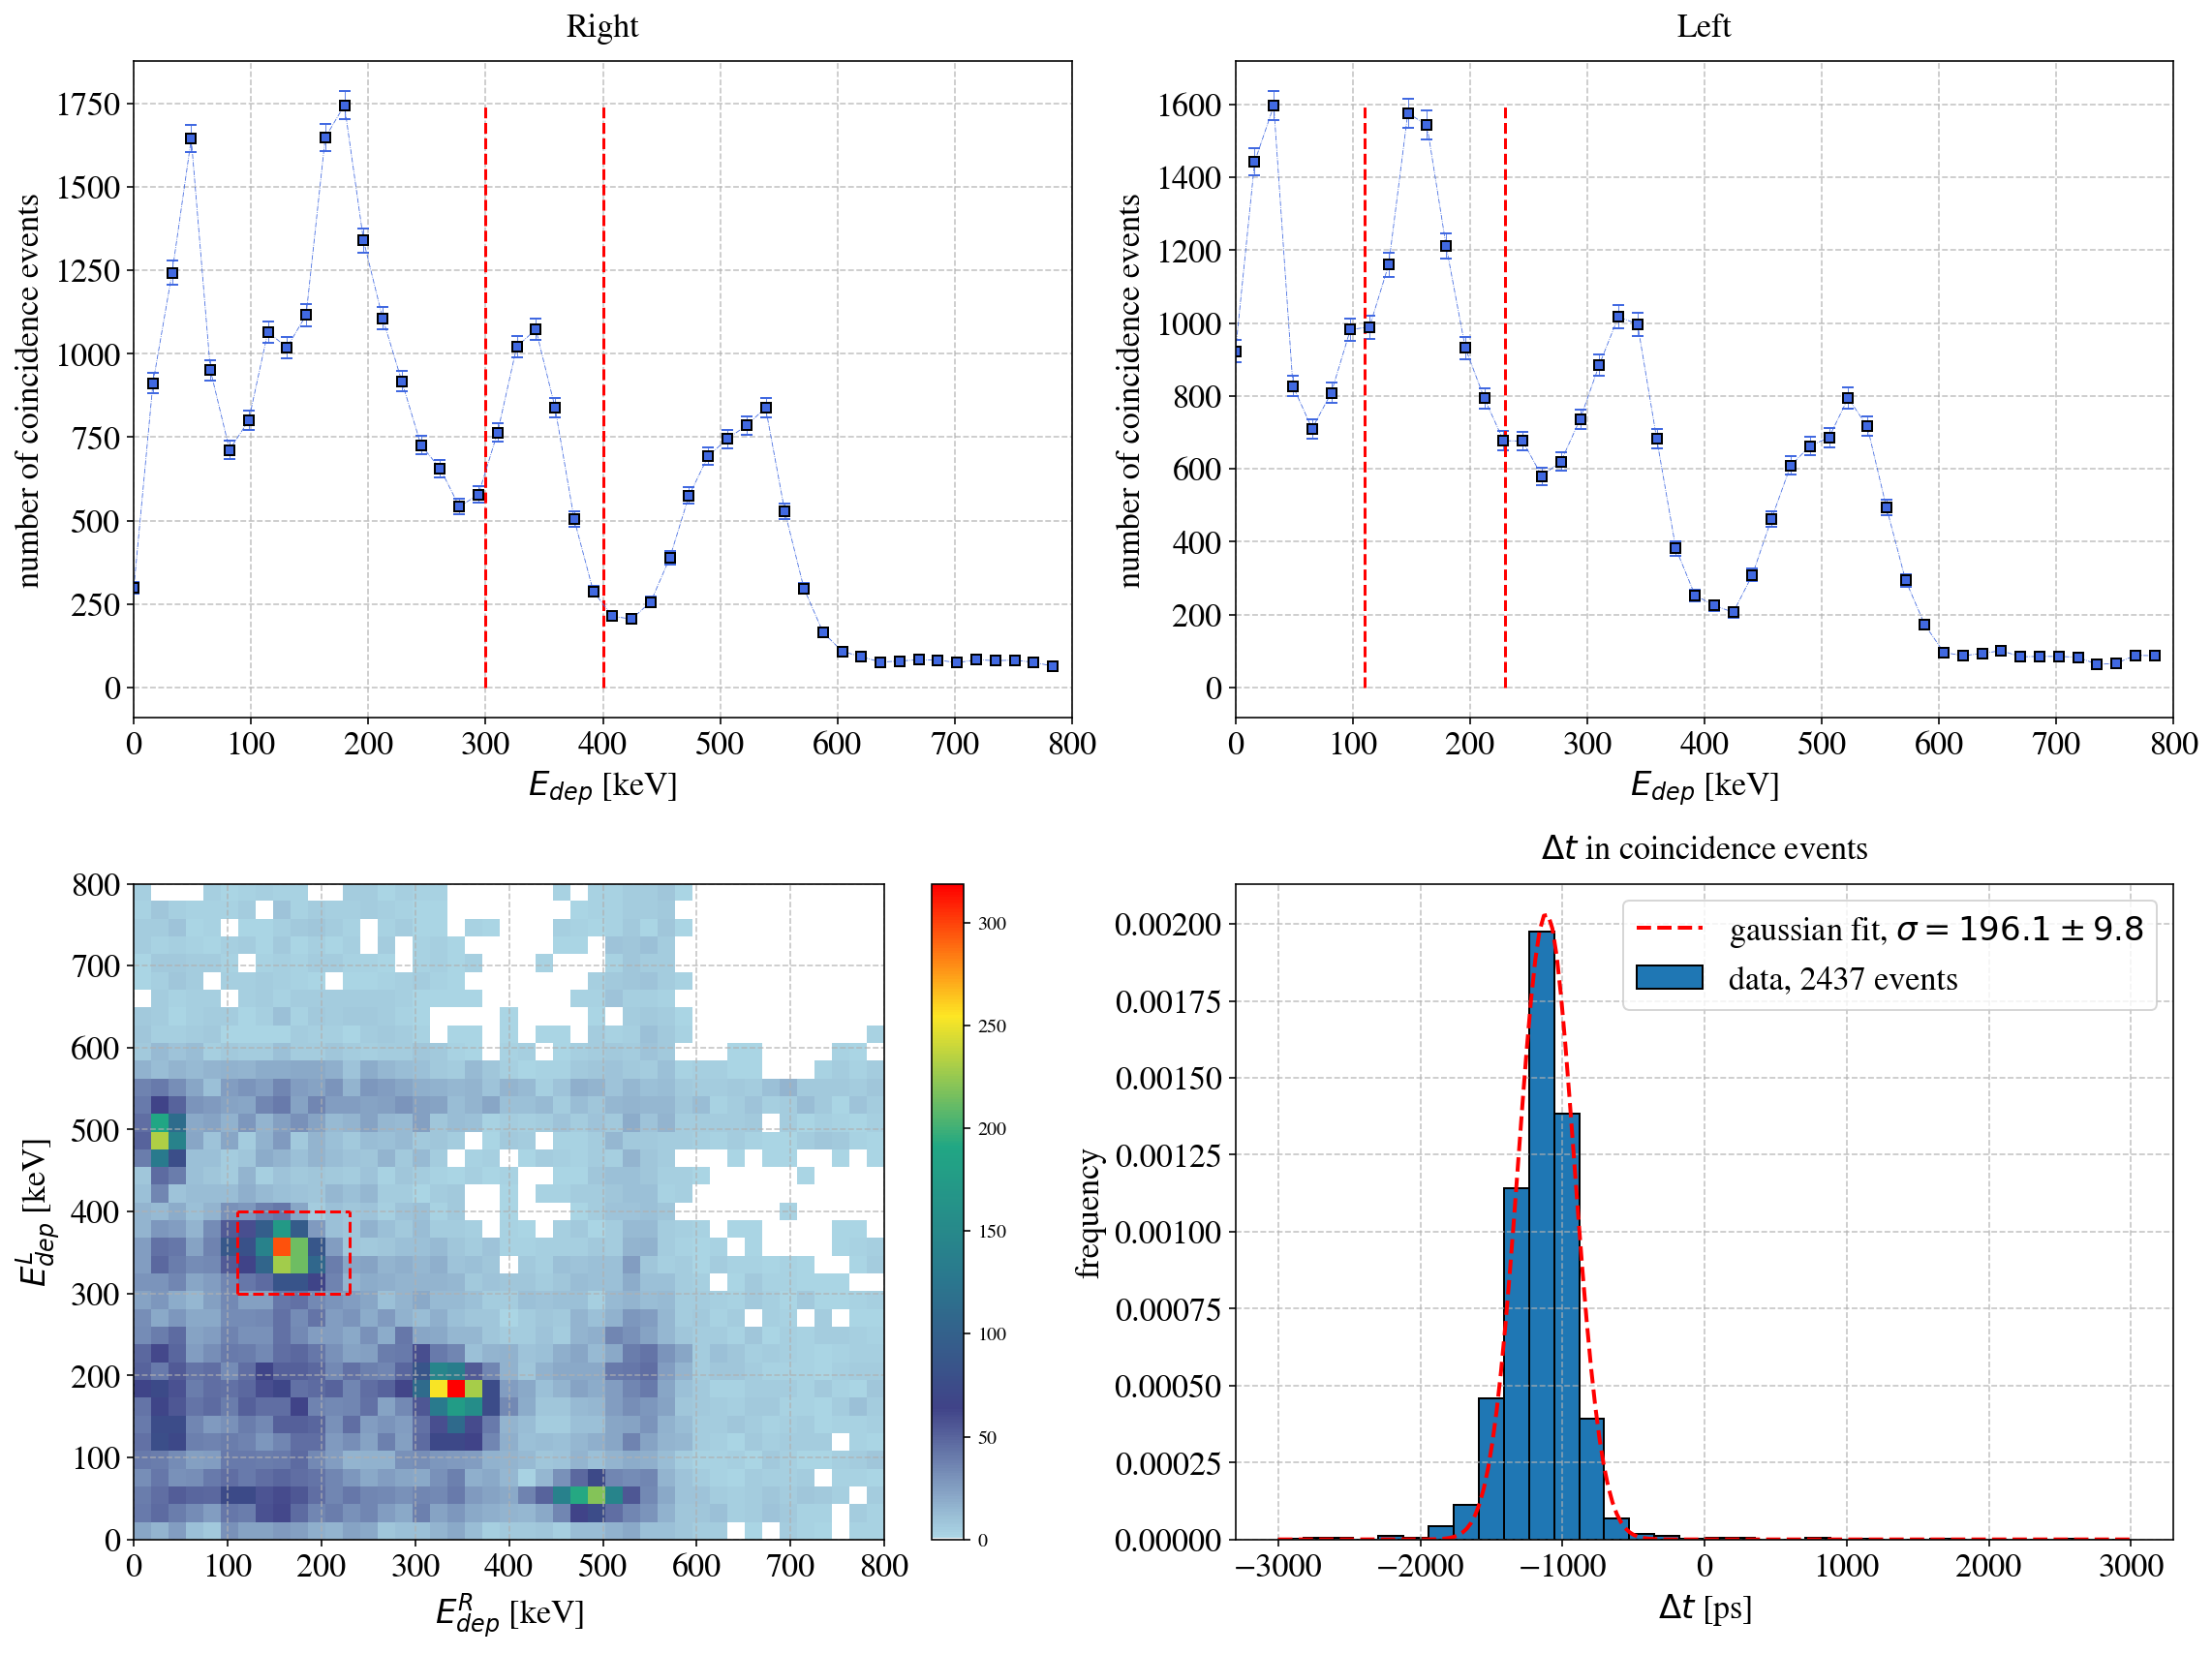

In [38]:
# time_difference_in_2SiPM_coincidence_measurement(coinc_data=coinc_data,bins=np.linspace(0,800,50),Epoly=Epoly,
#                                                  Edeplims_keV=(300,400,110,230),dt_lims=(-1.5e3,0.5e3),
#                                                  dt_bins=np.linspace(-3e3,3e3,35))
time_difference_in_2SiPM_coincidence_measurement(coinc_data=coinc_data,bins=np.linspace(0,800,50),Epoly=Epoly,
                                                 Edeplims_keV=(110,230,300,400),dt_lims=(-1.5e3,0.5e3),
                                                 dt_bins=np.linspace(-3e3,3e3,35))

save_figure(filename = main_figures_path + 'p1_22Na_coincidence_ADCcut_RComptonEdge_LComptonBS.pdf')

791 events in coincidence window and Edep limits
669 events fitting to Gaussian
mu: -394.2062780269058 ,sigma: 265.3958758200481


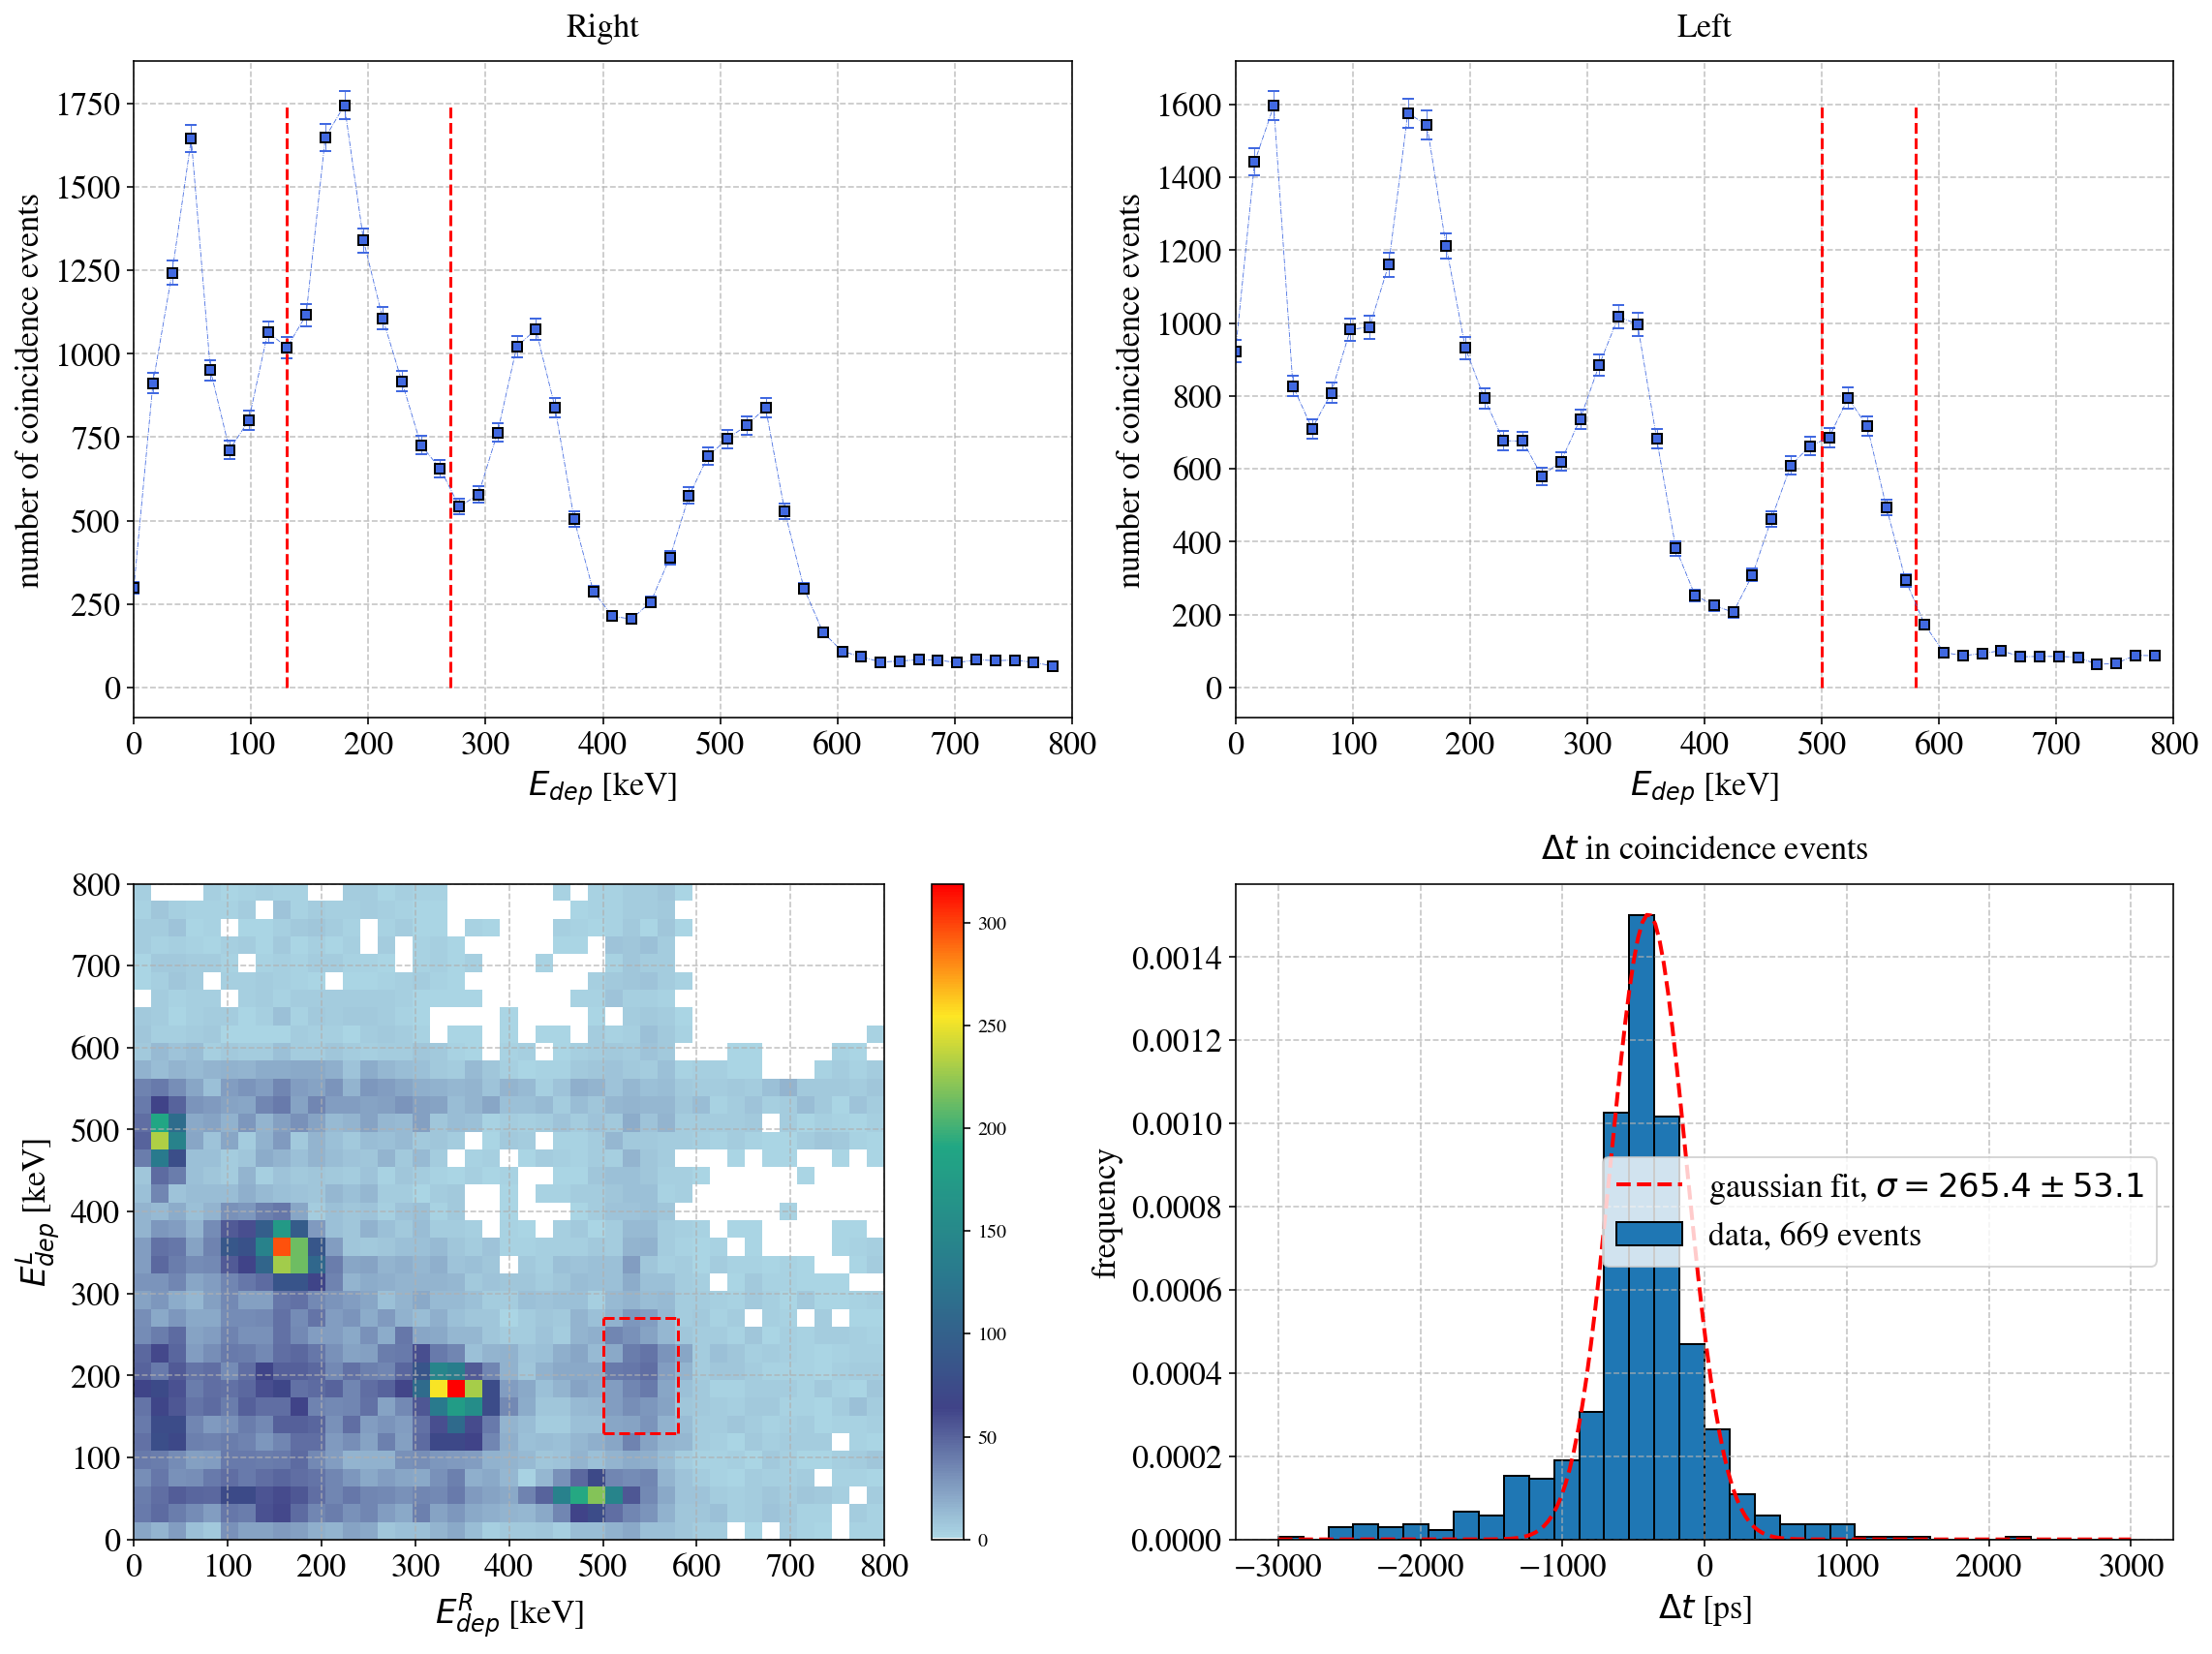

In [39]:
time_difference_in_2SiPM_coincidence_measurement(coinc_data=coinc_data,bins=np.linspace(0,800,50),Epoly=Epoly,
                                                 Edeplims_keV=(500,580,130,270),dt_lims=(-1.e3,0.5e3),
                                                 dt_bins=np.linspace(-3e3,3e3,35))


1765 events in coincidence window and Edep limits
1559 events fitting to Gaussian
mu: 565.2604233483002 ,sigma: 466.2285860639551
1722 events in coincidence window and Edep limits
1587 events fitting to Gaussian
mu: -2159.466288594833 ,sigma: 490.3605420645994


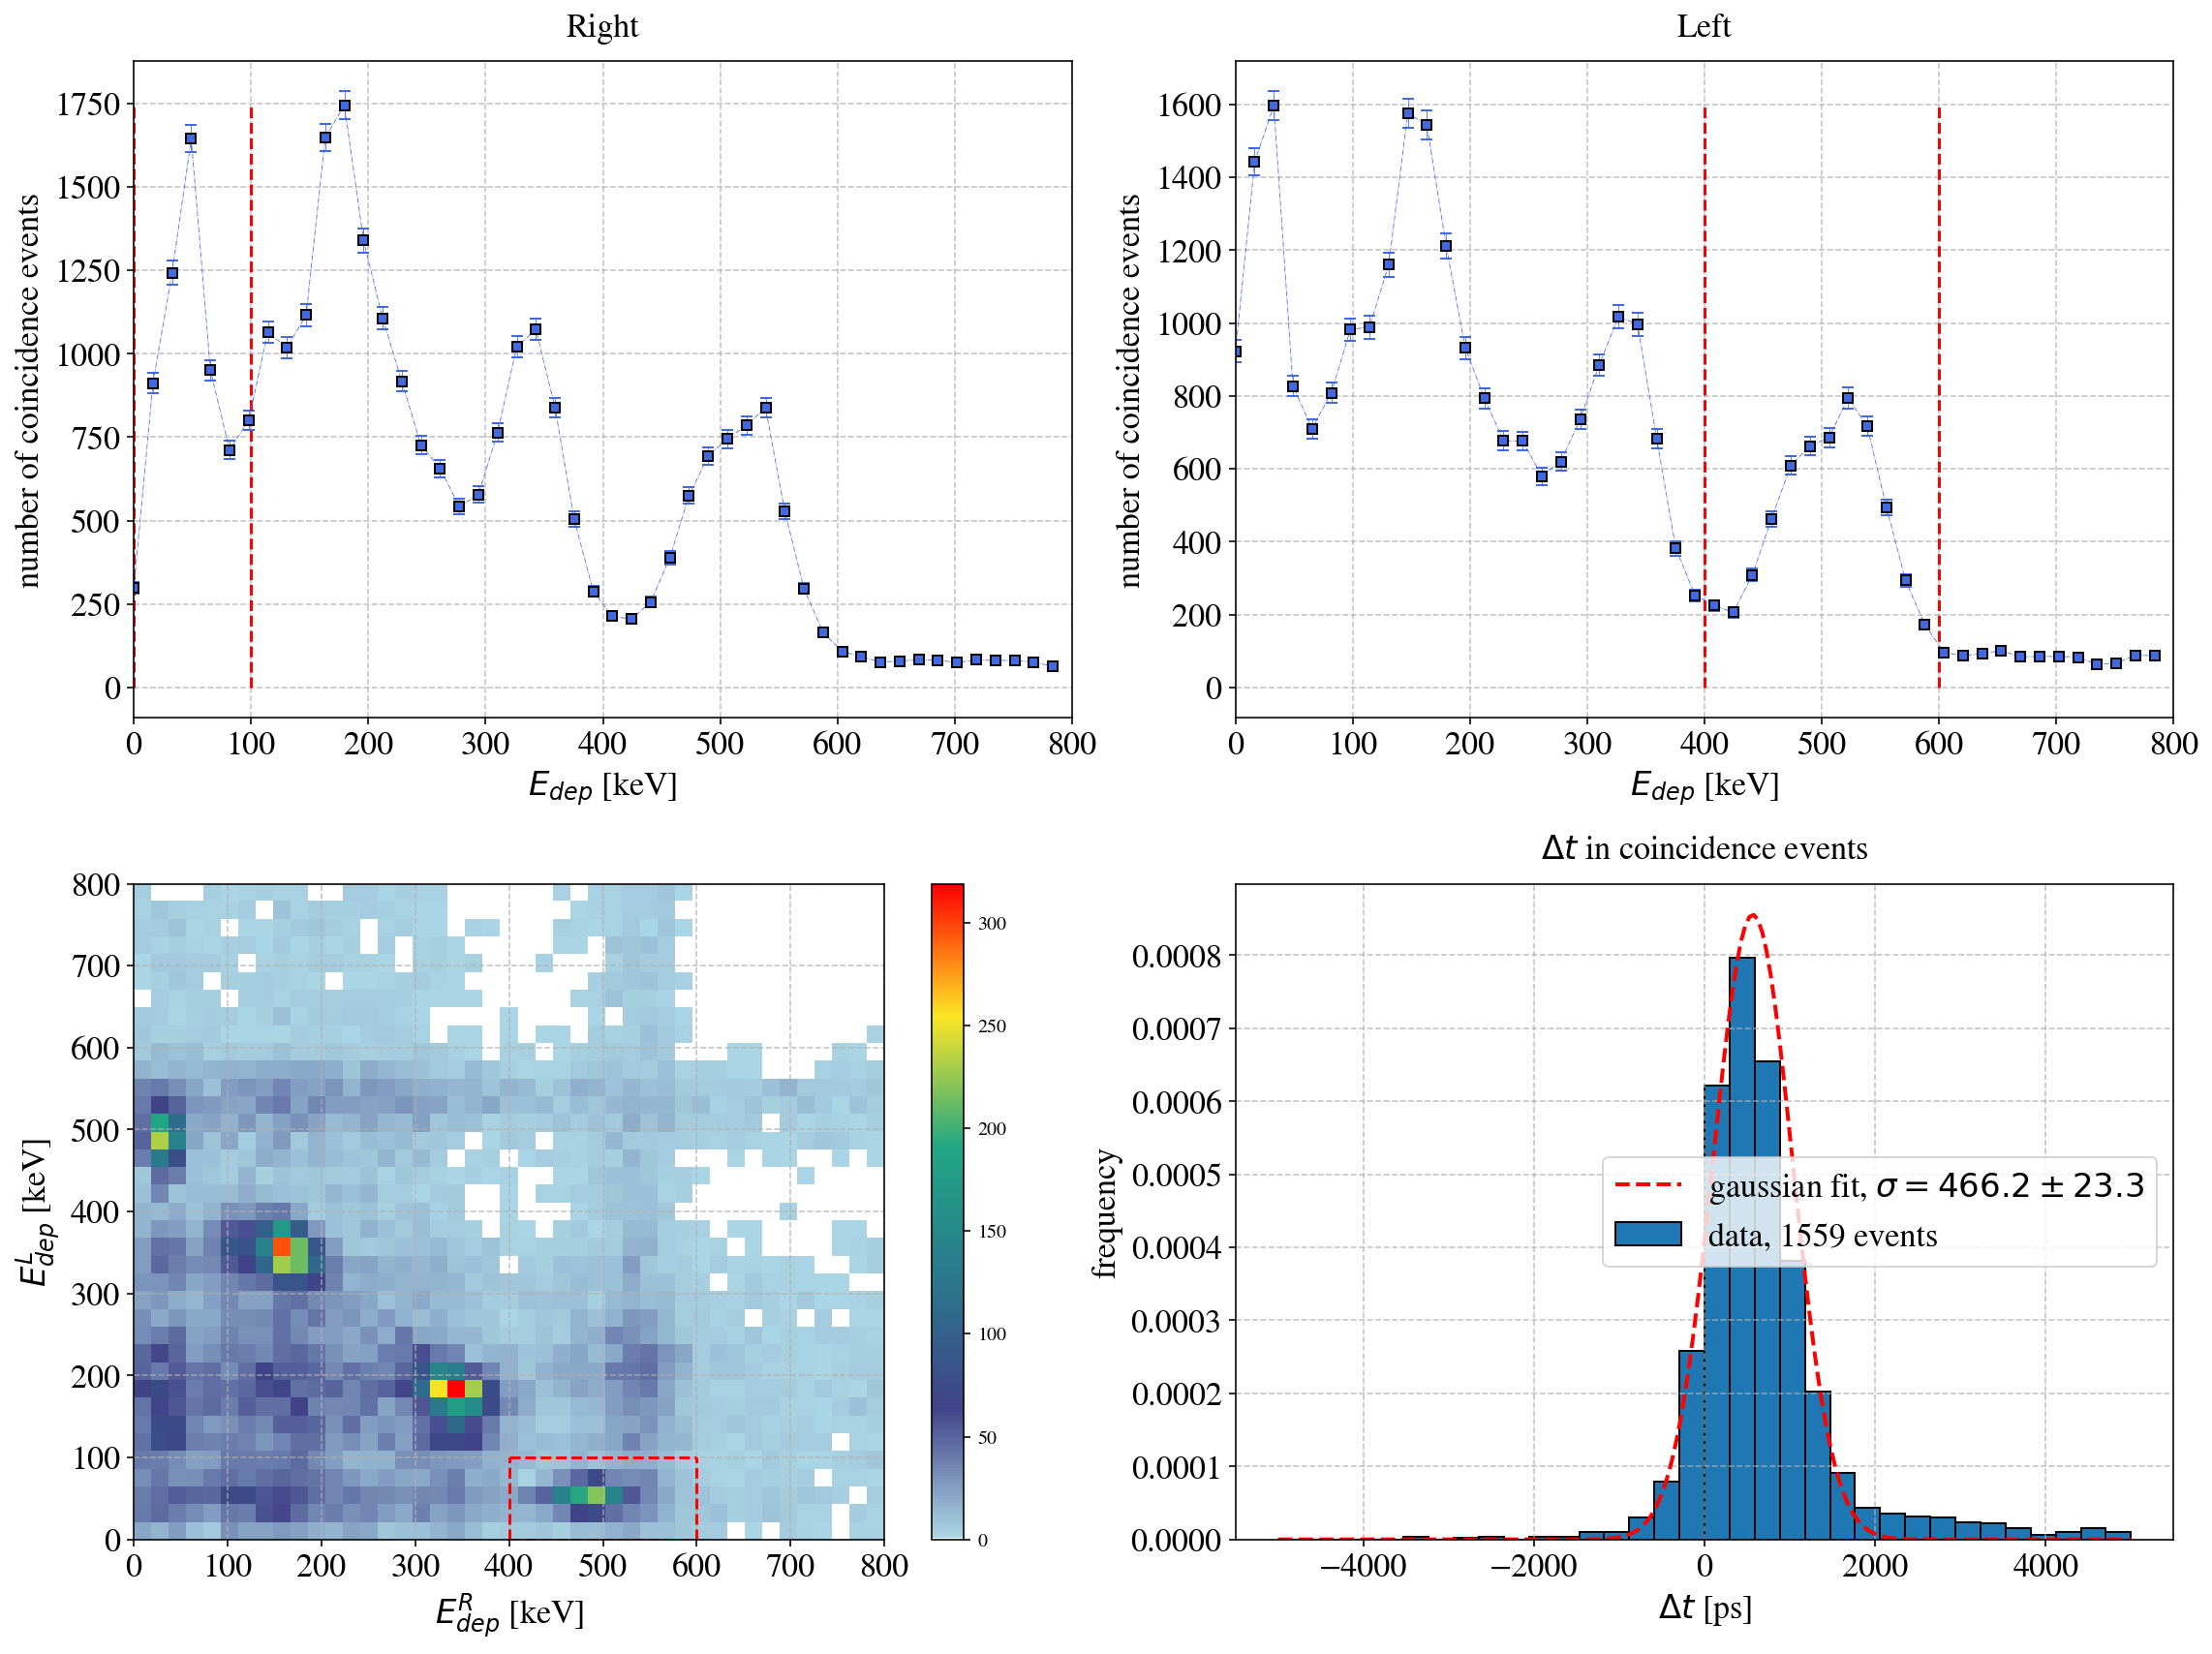

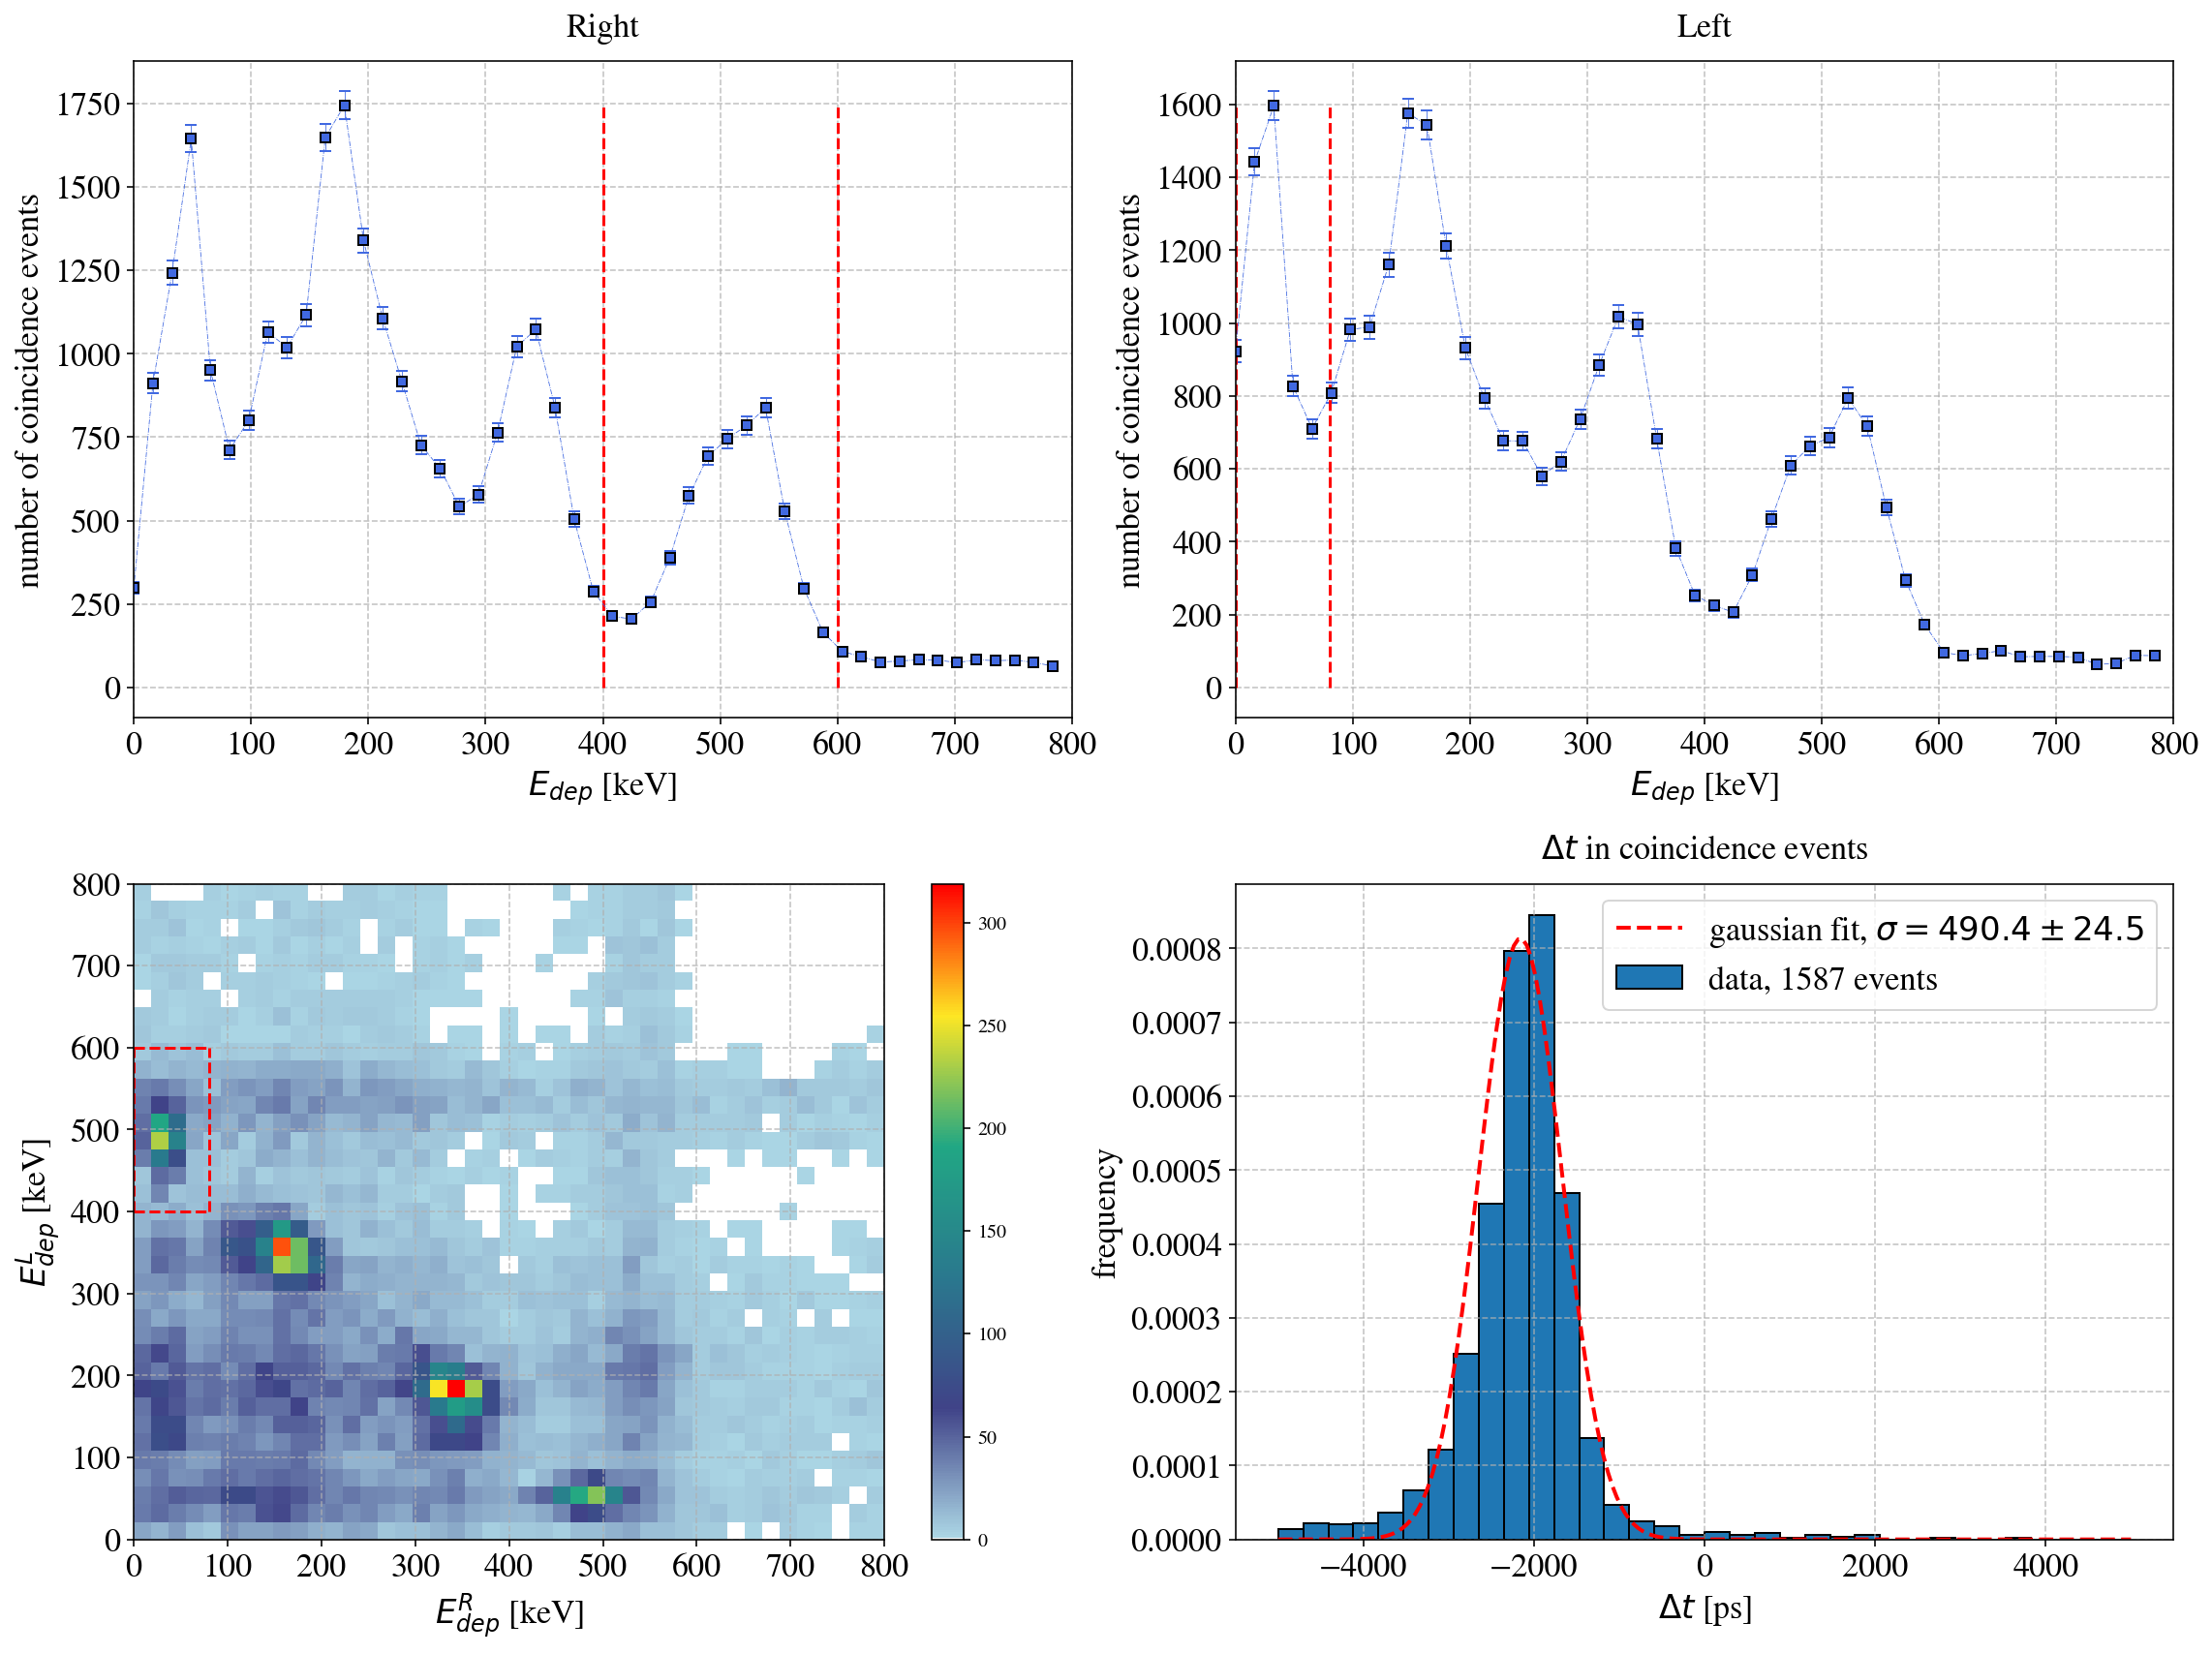

In [40]:
time_difference_in_2SiPM_coincidence_measurement(coinc_data=coinc_data,bins=np.linspace(0,800,50),Epoly=Epoly,
                                                 Edeplims_keV=(400,600,0,100),dt_lims=(-0.5e3,2.e3),
                                                 dt_bins=np.linspace(-5e3,5e3,35))

time_difference_in_2SiPM_coincidence_measurement(coinc_data=coinc_data,bins=np.linspace(0,800,50),Epoly=Epoly,
                                                 Edeplims_keV=(0,80,400,600),dt_lims=(-4.e3,-1.e3),
                                                 dt_bins=np.linspace(-5e3,5e3,35))

## two detectors on the same side of the source

In [41]:
dT_Na22 = 3600.0 # sec
filename = ('/Users/erezcohen/Desktop/data/PETsys/Prototype1/Na22_source_0.8uC_8Nov2020/'+
            'Na22_bothLYSOsOnTheSameSide_%d_sec_coinc.dat'%dT_Na22)
coinc_same_side_of_source = pd.read_csv(filename,delimiter='\t',names=['mh-n1','mh-j1','t1','Q1','ch1','mh-n2','mh-j2','t2','Q2','ch2'])

print('done reading data for two detectors on the same side of the source.')

done reading data for two detectors on the same side of the source.


4634 events in coincidence window and Edep limits
4183 events fitting to Gaussian
mu: -19.038489122639255 ,sigma: 787.4844131062595
saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1/Figures/p1_same_side_of_source_22Na_coincidence_noADCcut.pdf


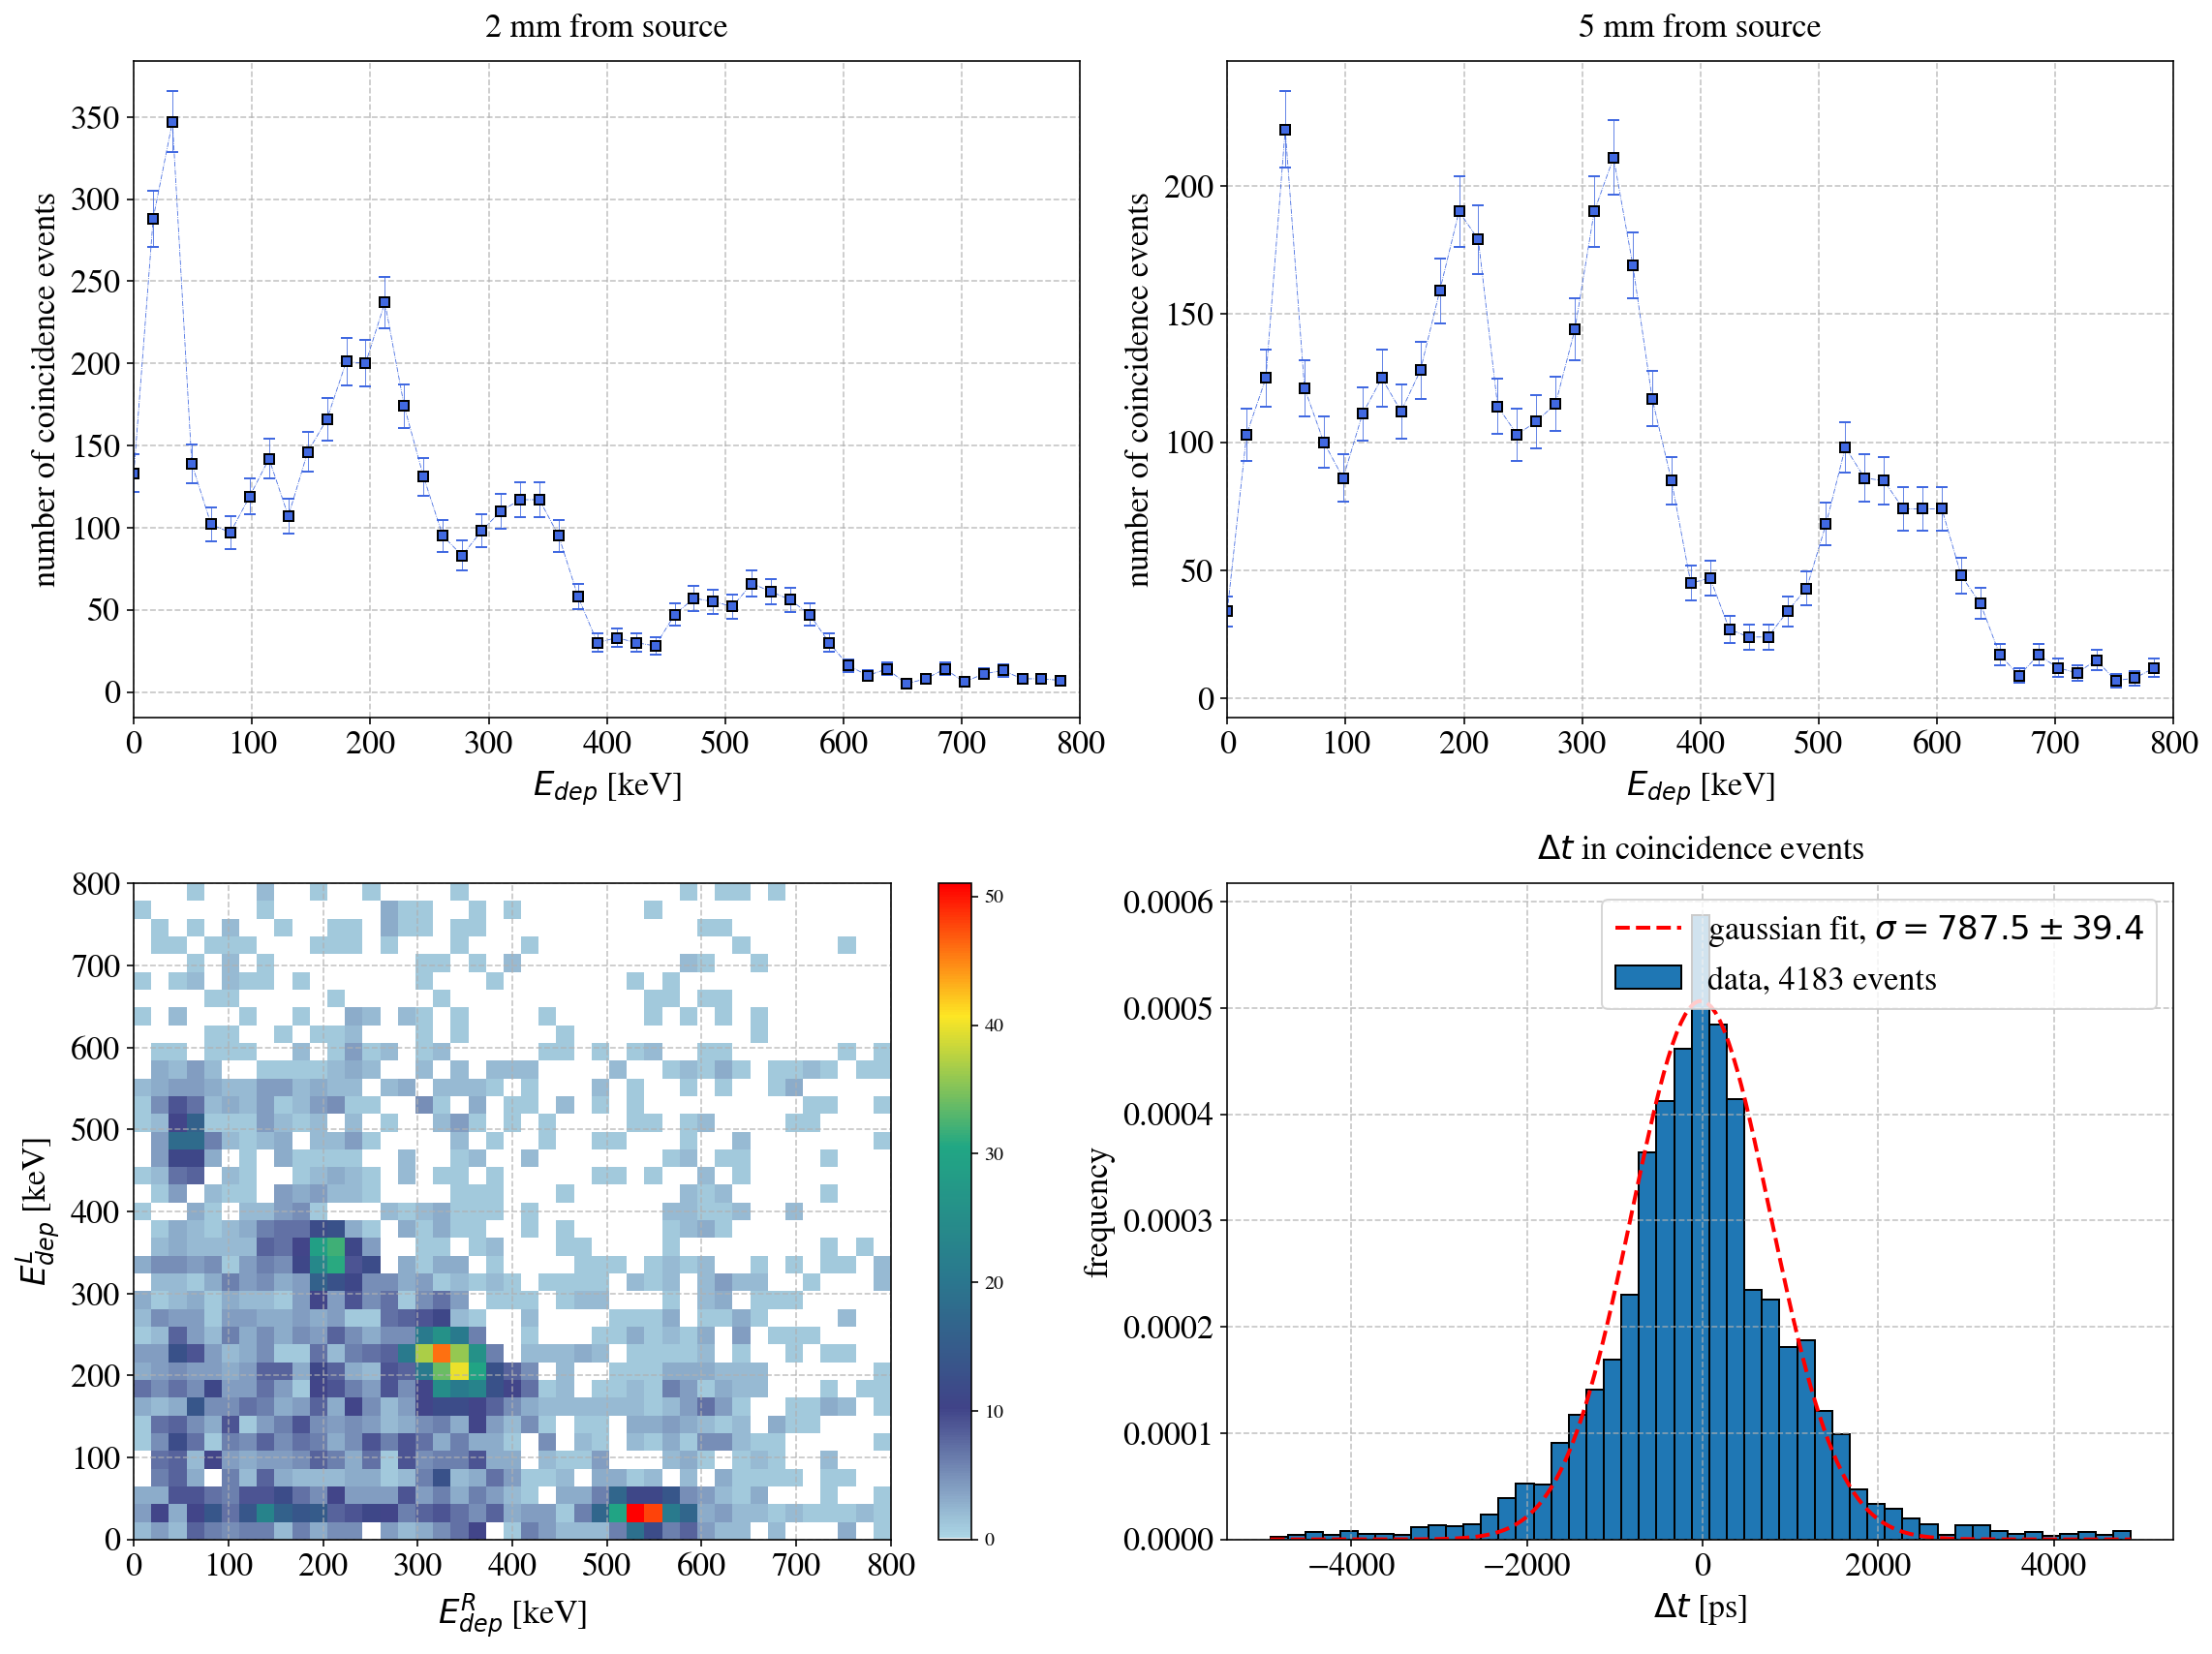

In [42]:
time_difference_in_2SiPM_coincidence_measurement(coinc_data=coinc_same_side_of_source,Epoly=Epoly,
                                                 channels=[610,482],
                                                 calibration_channels=[533,482],
                                                 bins=np.linspace(0,800,50),detector_labels=['5 mm from source','2 mm from source'])
save_figure(filename = main_figures_path + 'p1_same_side_of_source_22Na_coincidence_noADCcut.pdf')

61 events in coincidence window and Edep limits
57 events fitting to Gaussian
mu: -200.8421052631579 ,sigma: 351.14968015971425
saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1/Figures/p1_same_side_of_source_22Na_coincidence_ADCcut_511photopeak_both.pdf


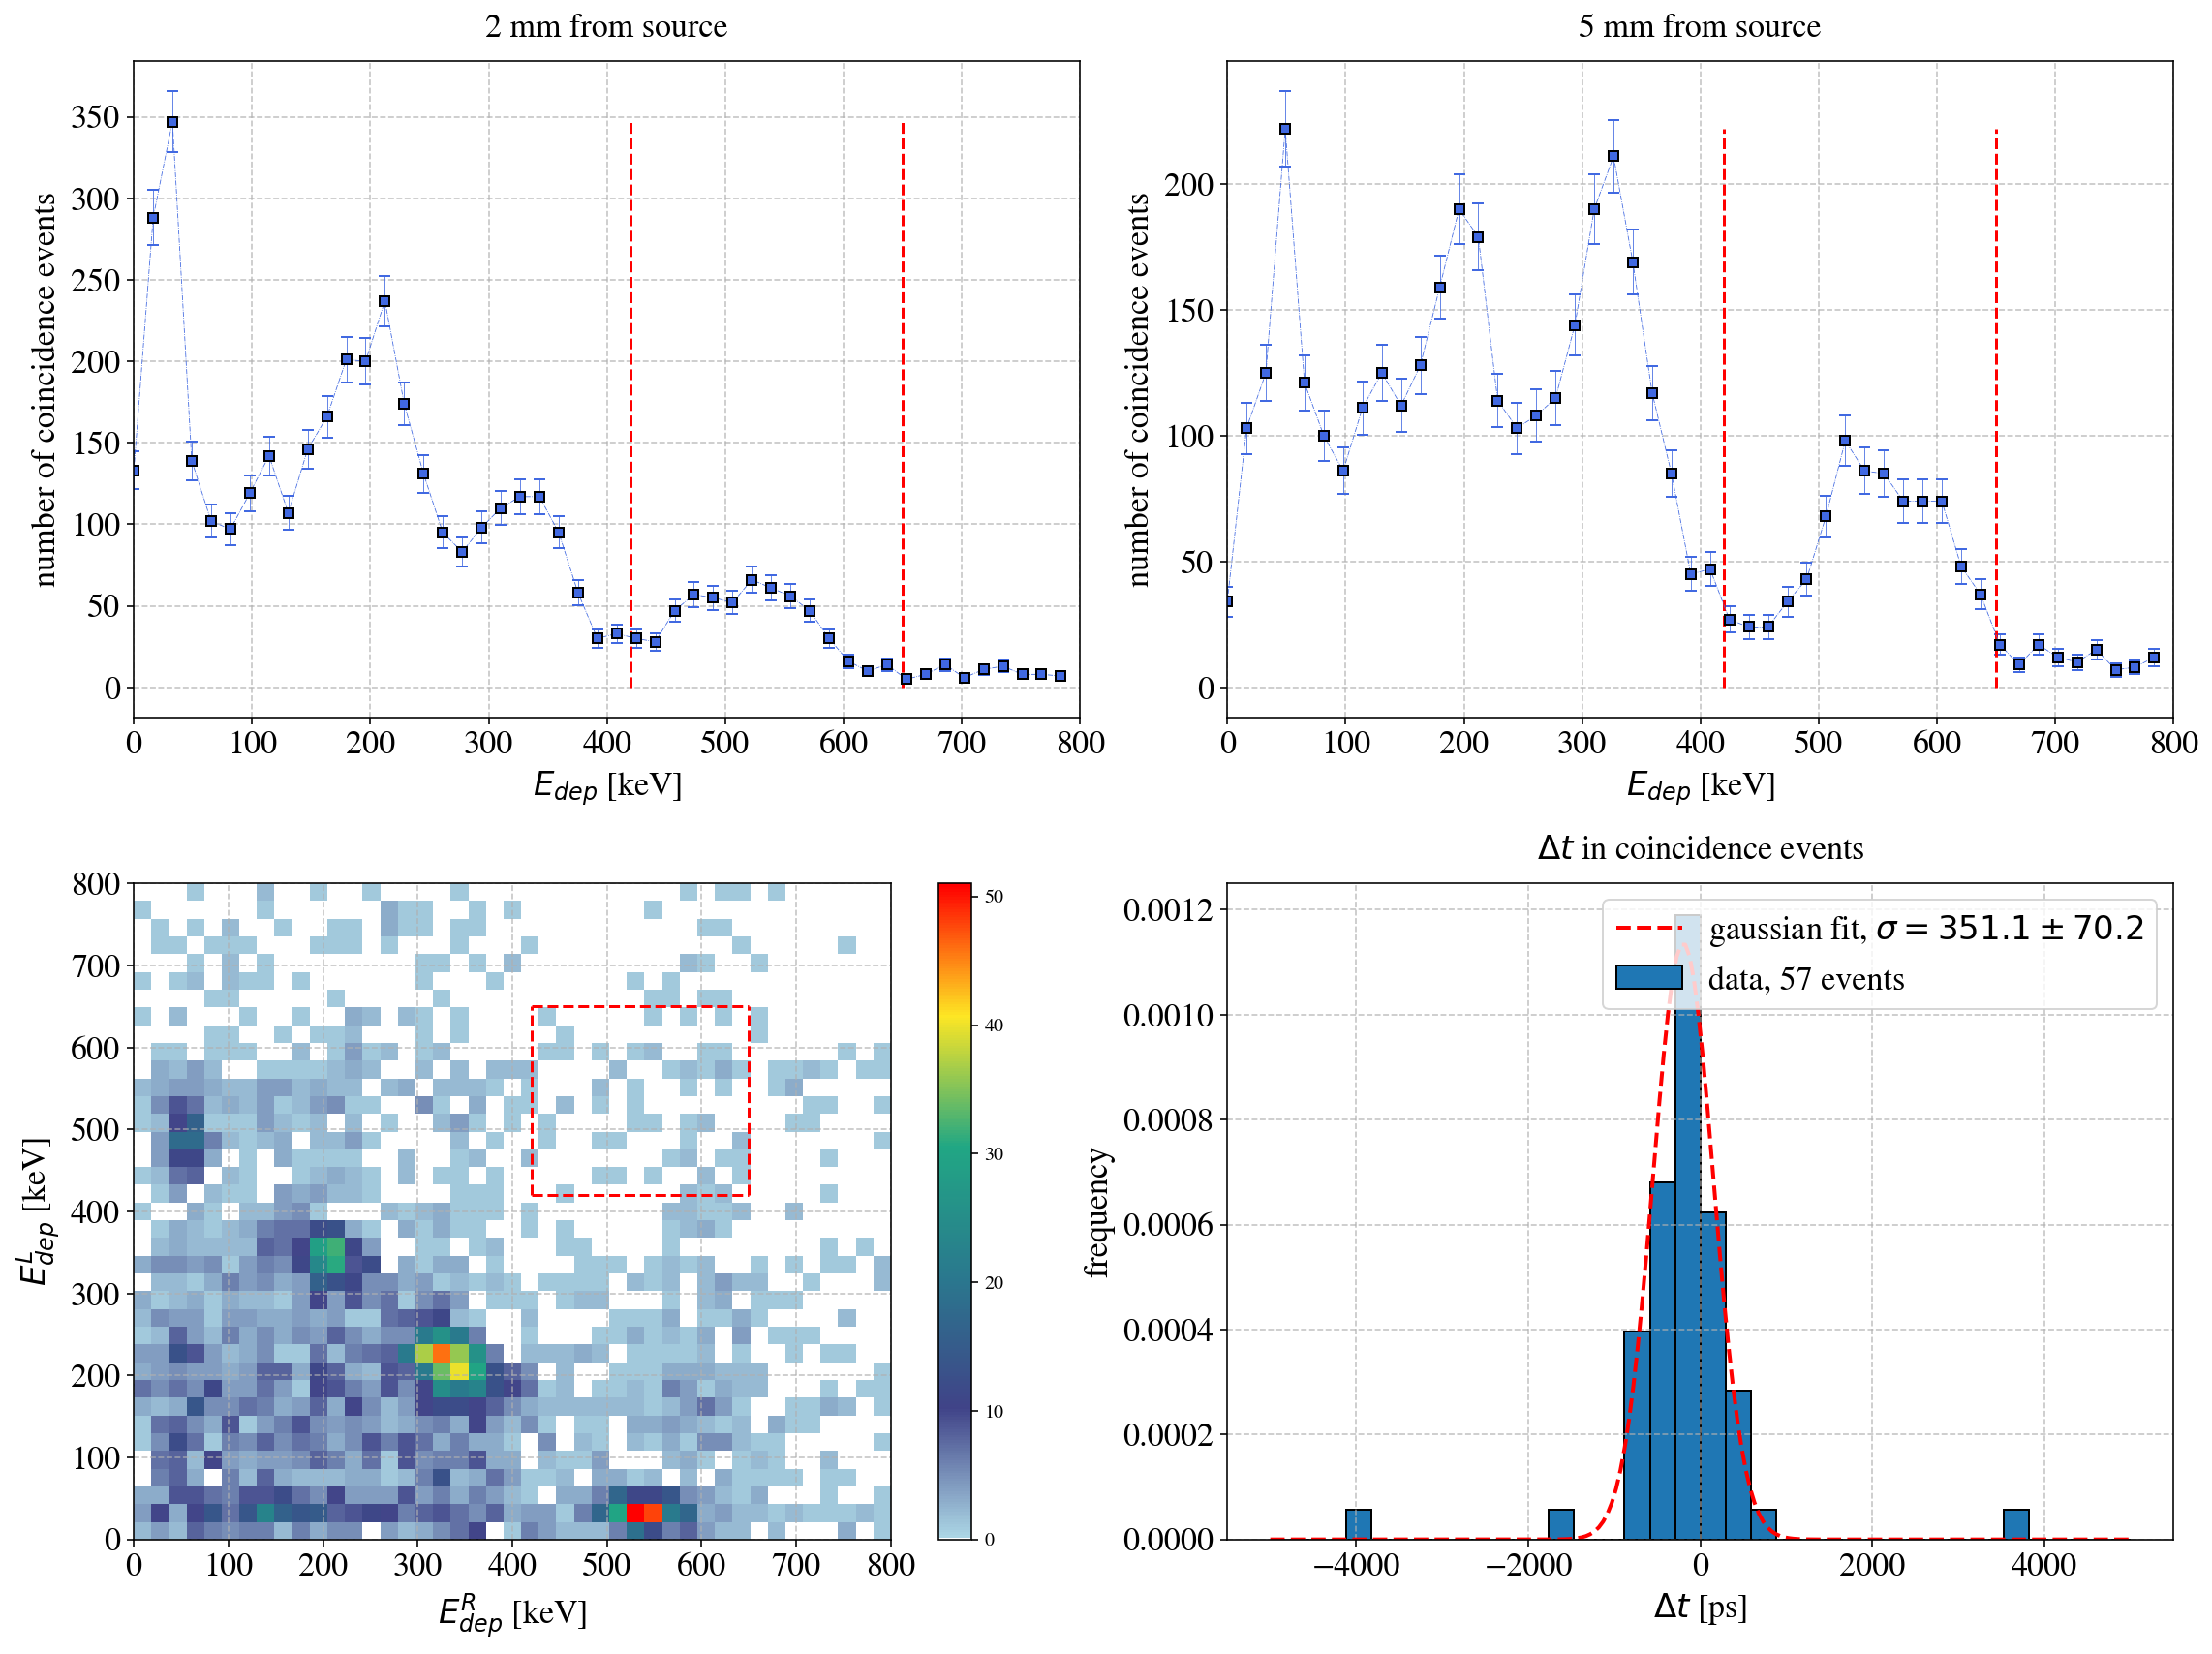

In [43]:
time_difference_in_2SiPM_coincidence_measurement(coinc_data=coinc_same_side_of_source,Epoly=Epoly,
                                                 channels=[610,482],
                                                 calibration_channels=[533,482],
                                                 bins=np.linspace(0,800,50),
                                                 Edeplims_keV=(420,650),dt_lims=(-1.5e3,0.5e3),
                                                 dt_bins=np.linspace(-5e3,5e3,35),
                                                 detector_labels=['5 mm from source','2 mm from source'])
save_figure(filename = main_figures_path + 'p1_same_side_of_source_22Na_coincidence_ADCcut_511photopeak_both.pdf')

636 events in coincidence window and Edep limits
622 events fitting to Gaussian
mu: 4.104501607717042 ,sigma: 195.04789669580904
saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1/Figures/p1_same_side_of_source_22Na_coincidence_ADCcut_RComptonEdge_LComptonBS.pdf


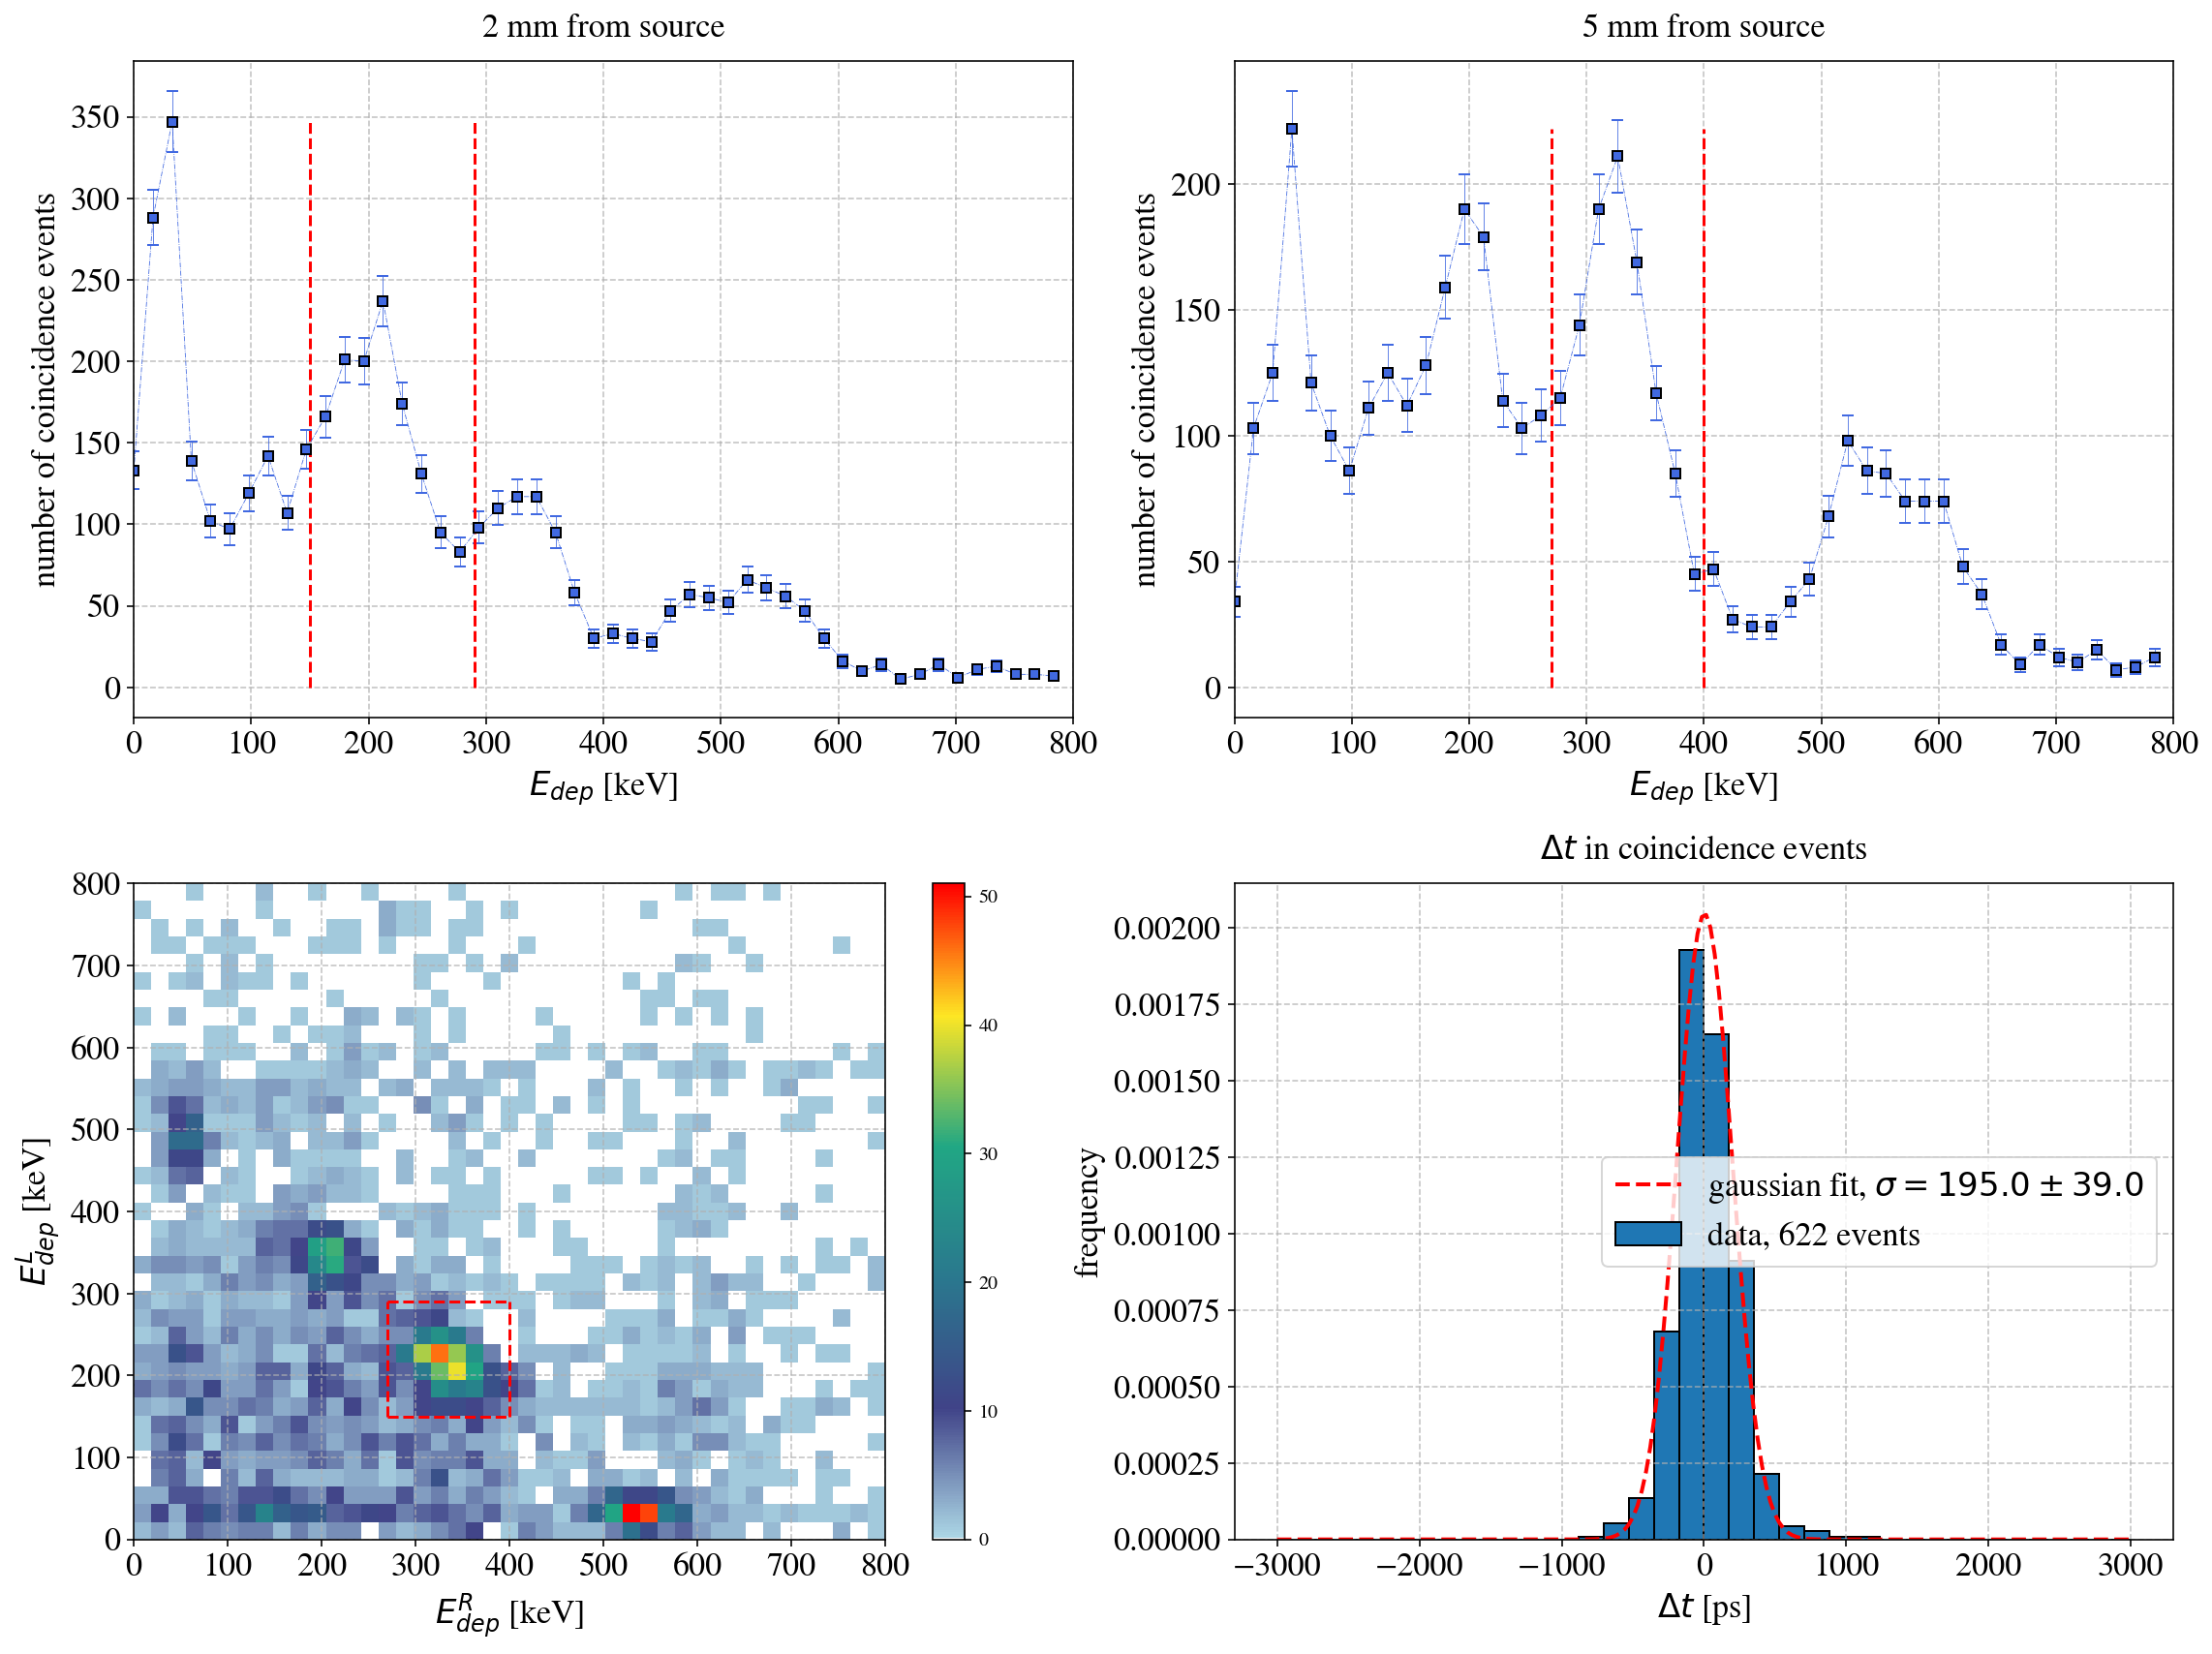

In [44]:
time_difference_in_2SiPM_coincidence_measurement(coinc_data=coinc_same_side_of_source,                                                                                
                                                 channels=[610,482],
                                                 calibration_channels=[533,482],
                                                 bins=np.linspace(0,800,50),Epoly=Epoly,
                                                 Edeplims_keV=(270,400,150,290),dt_lims=(-1.5e3,0.5e3),
                                                 dt_bins=np.linspace(-3e3,3e3,35),
                                                 detector_labels=['5 mm from source','2 mm from source'])

save_figure(filename = main_figures_path + 'p1_same_side_of_source_22Na_coincidence_ADCcut_RComptonEdge_LComptonBS.pdf')

## detectors 10 mm from source

In [45]:
dT_Na22 = 7000.0 # sec
filename = ('/Users/erezcohen/Desktop/data/PETsys/Prototype1/Na22_source_0.8uC_3Dec2020/'+
            'Na22_ScintSourceDistance_10mm_%dsec_coinc.dat'%dT_Na22)
coinc_10mm_from_source = pd.read_csv(filename,delimiter='\t',names=['mh-n1','mh-j1','t1','Q1','ch1','mh-n2','mh-j2','t2','Q2','ch2'])

print('done reading data for two detectors 10 mm from source.')

done reading data for two detectors 10 mm from source.


46883 events in coincidence window and Edep limits
42899 events fitting to Gaussian
mu: -682.7460779971561 ,sigma: 586.3656878611458
saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1/Figures/p1_10mm_from_source_22Na_coincidence_noADCcut.pdf


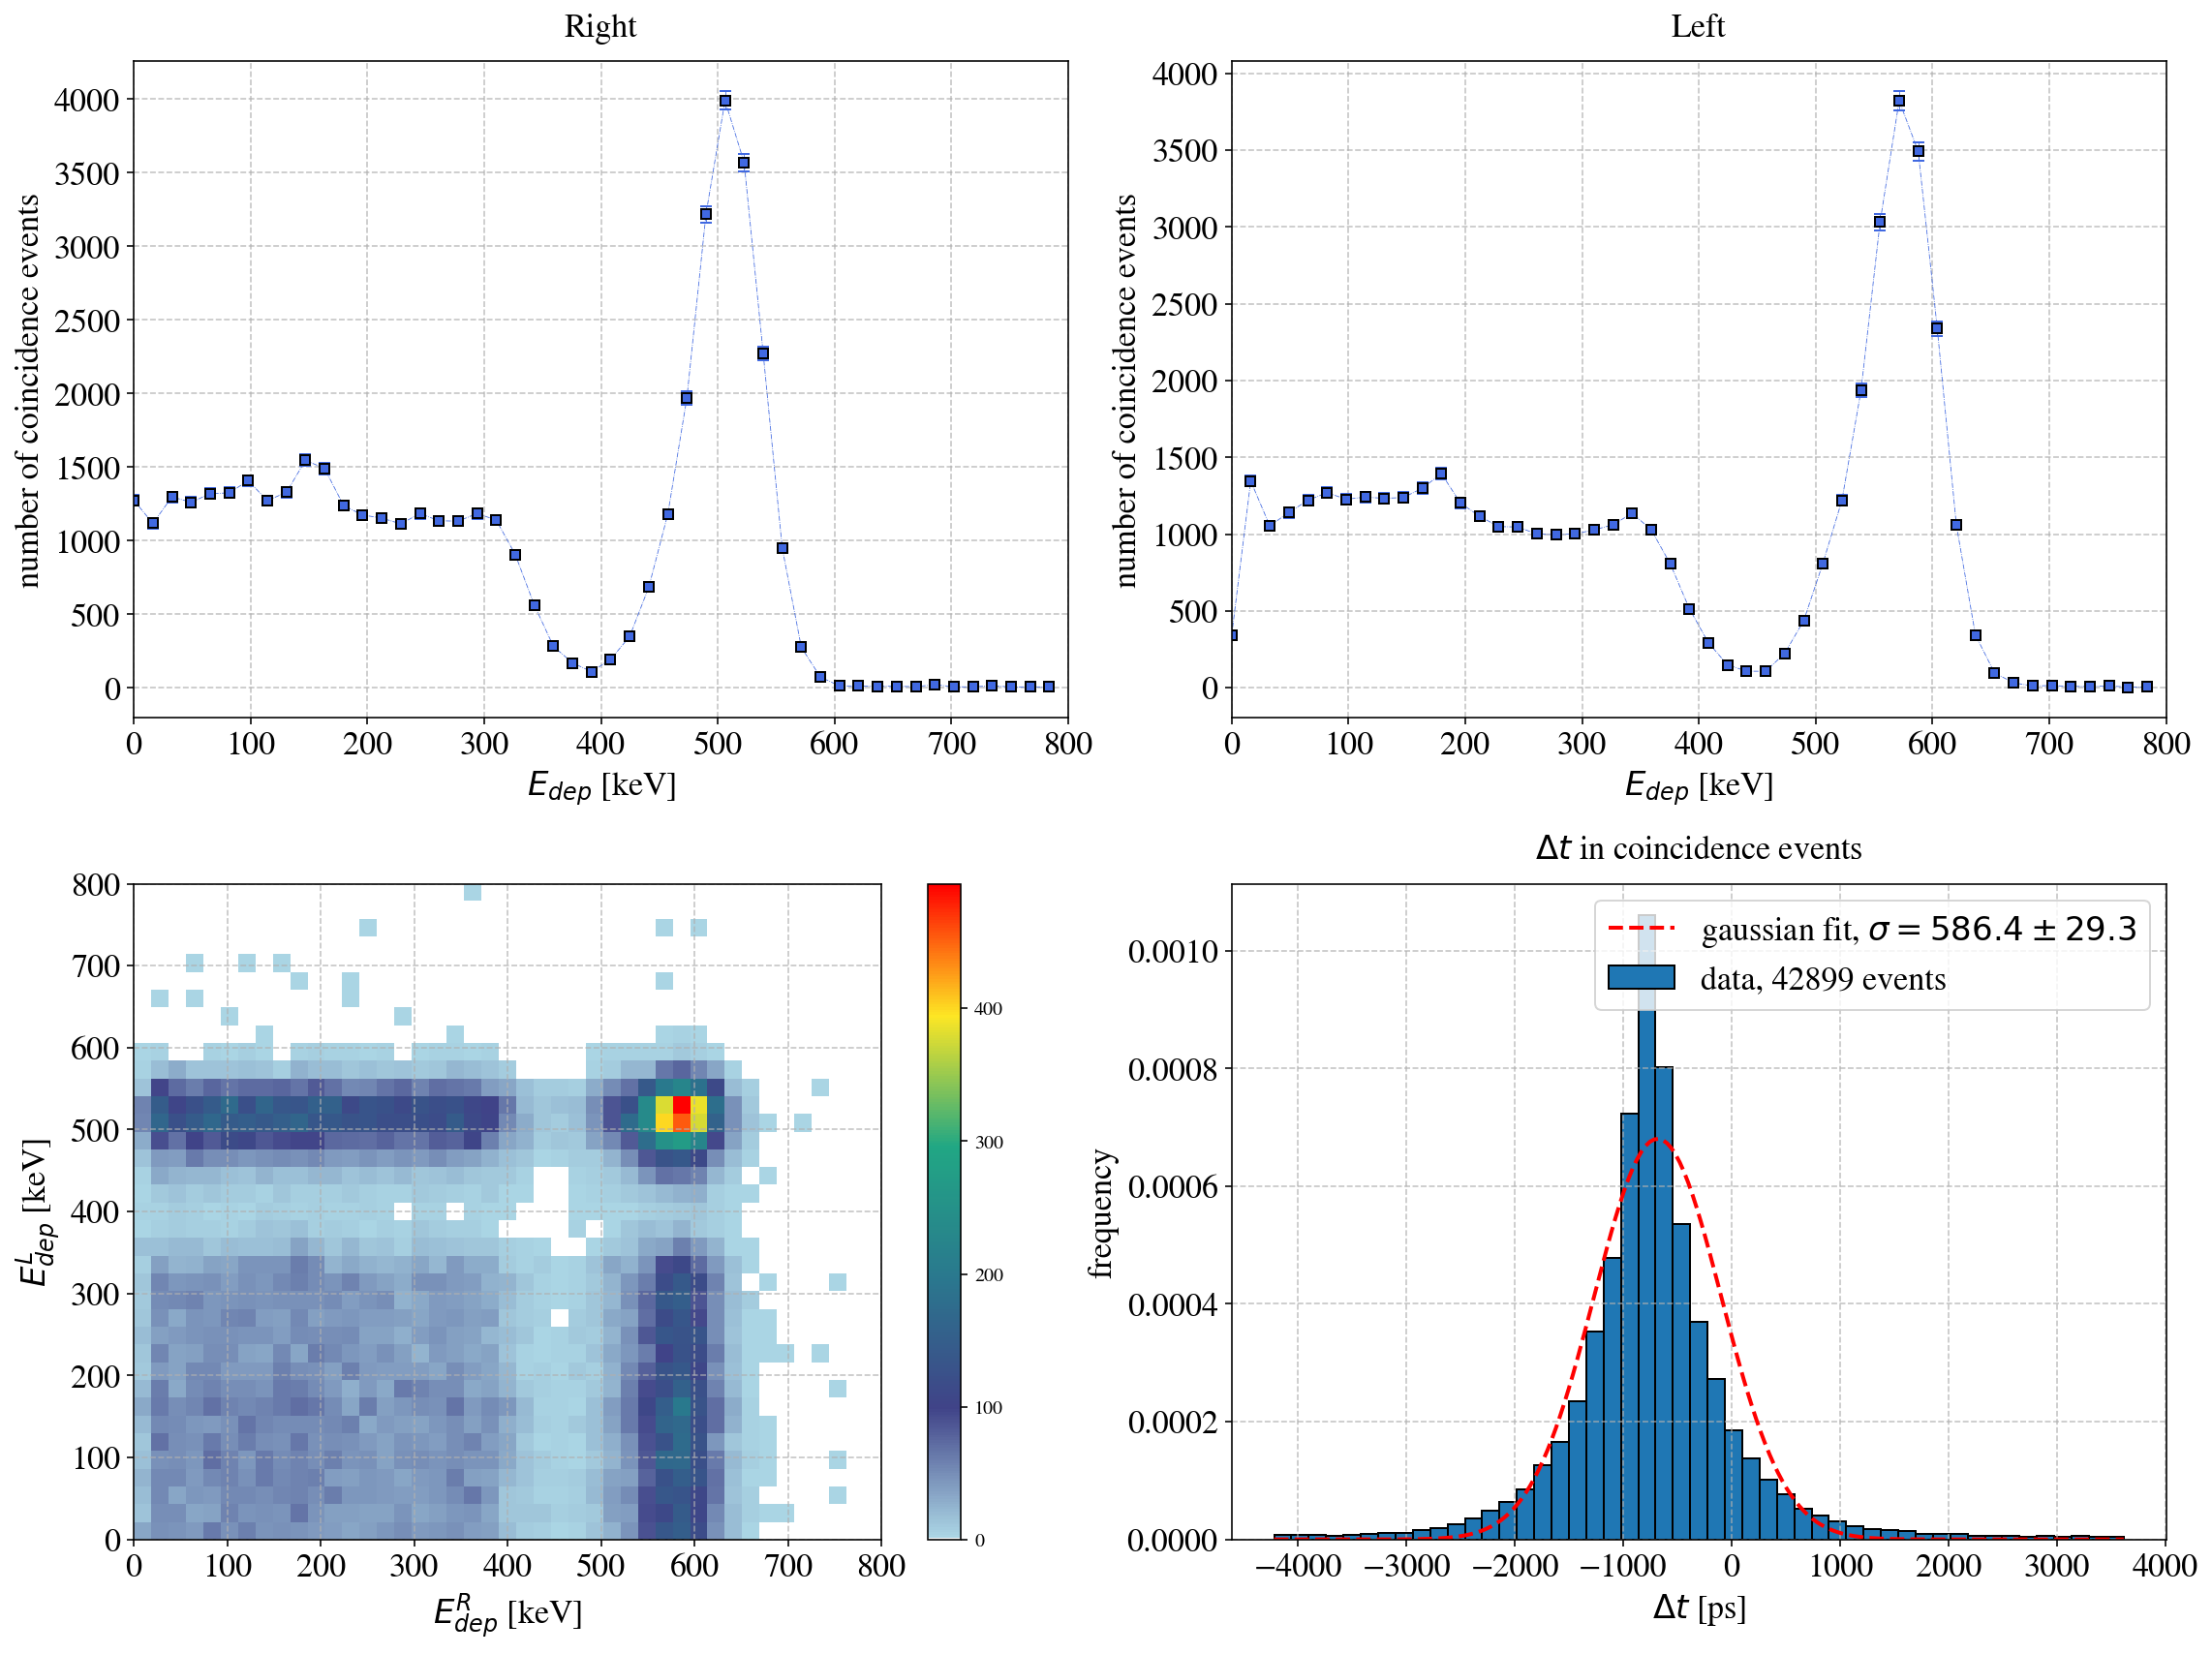

In [46]:
time_difference_in_2SiPM_coincidence_measurement(coinc_data=coinc_10mm_from_source,Epoly=Epoly,
                                                 channels=[533,482],
                                                 calibration_channels=[533,482],
                                                 bins=np.linspace(0,800,50))
save_figure(filename = main_figures_path + 'p1_10mm_from_source_22Na_coincidence_noADCcut.pdf')

7247 events in coincidence window and Edep limits
7241 events fitting to Gaussian
mu: -763.9261151774617 ,sigma: 110.66106084305645
saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1/Figures/p1_10mm_from_source_22Na_coincidence_ADCcut_511photopeak_both_sides.pdf


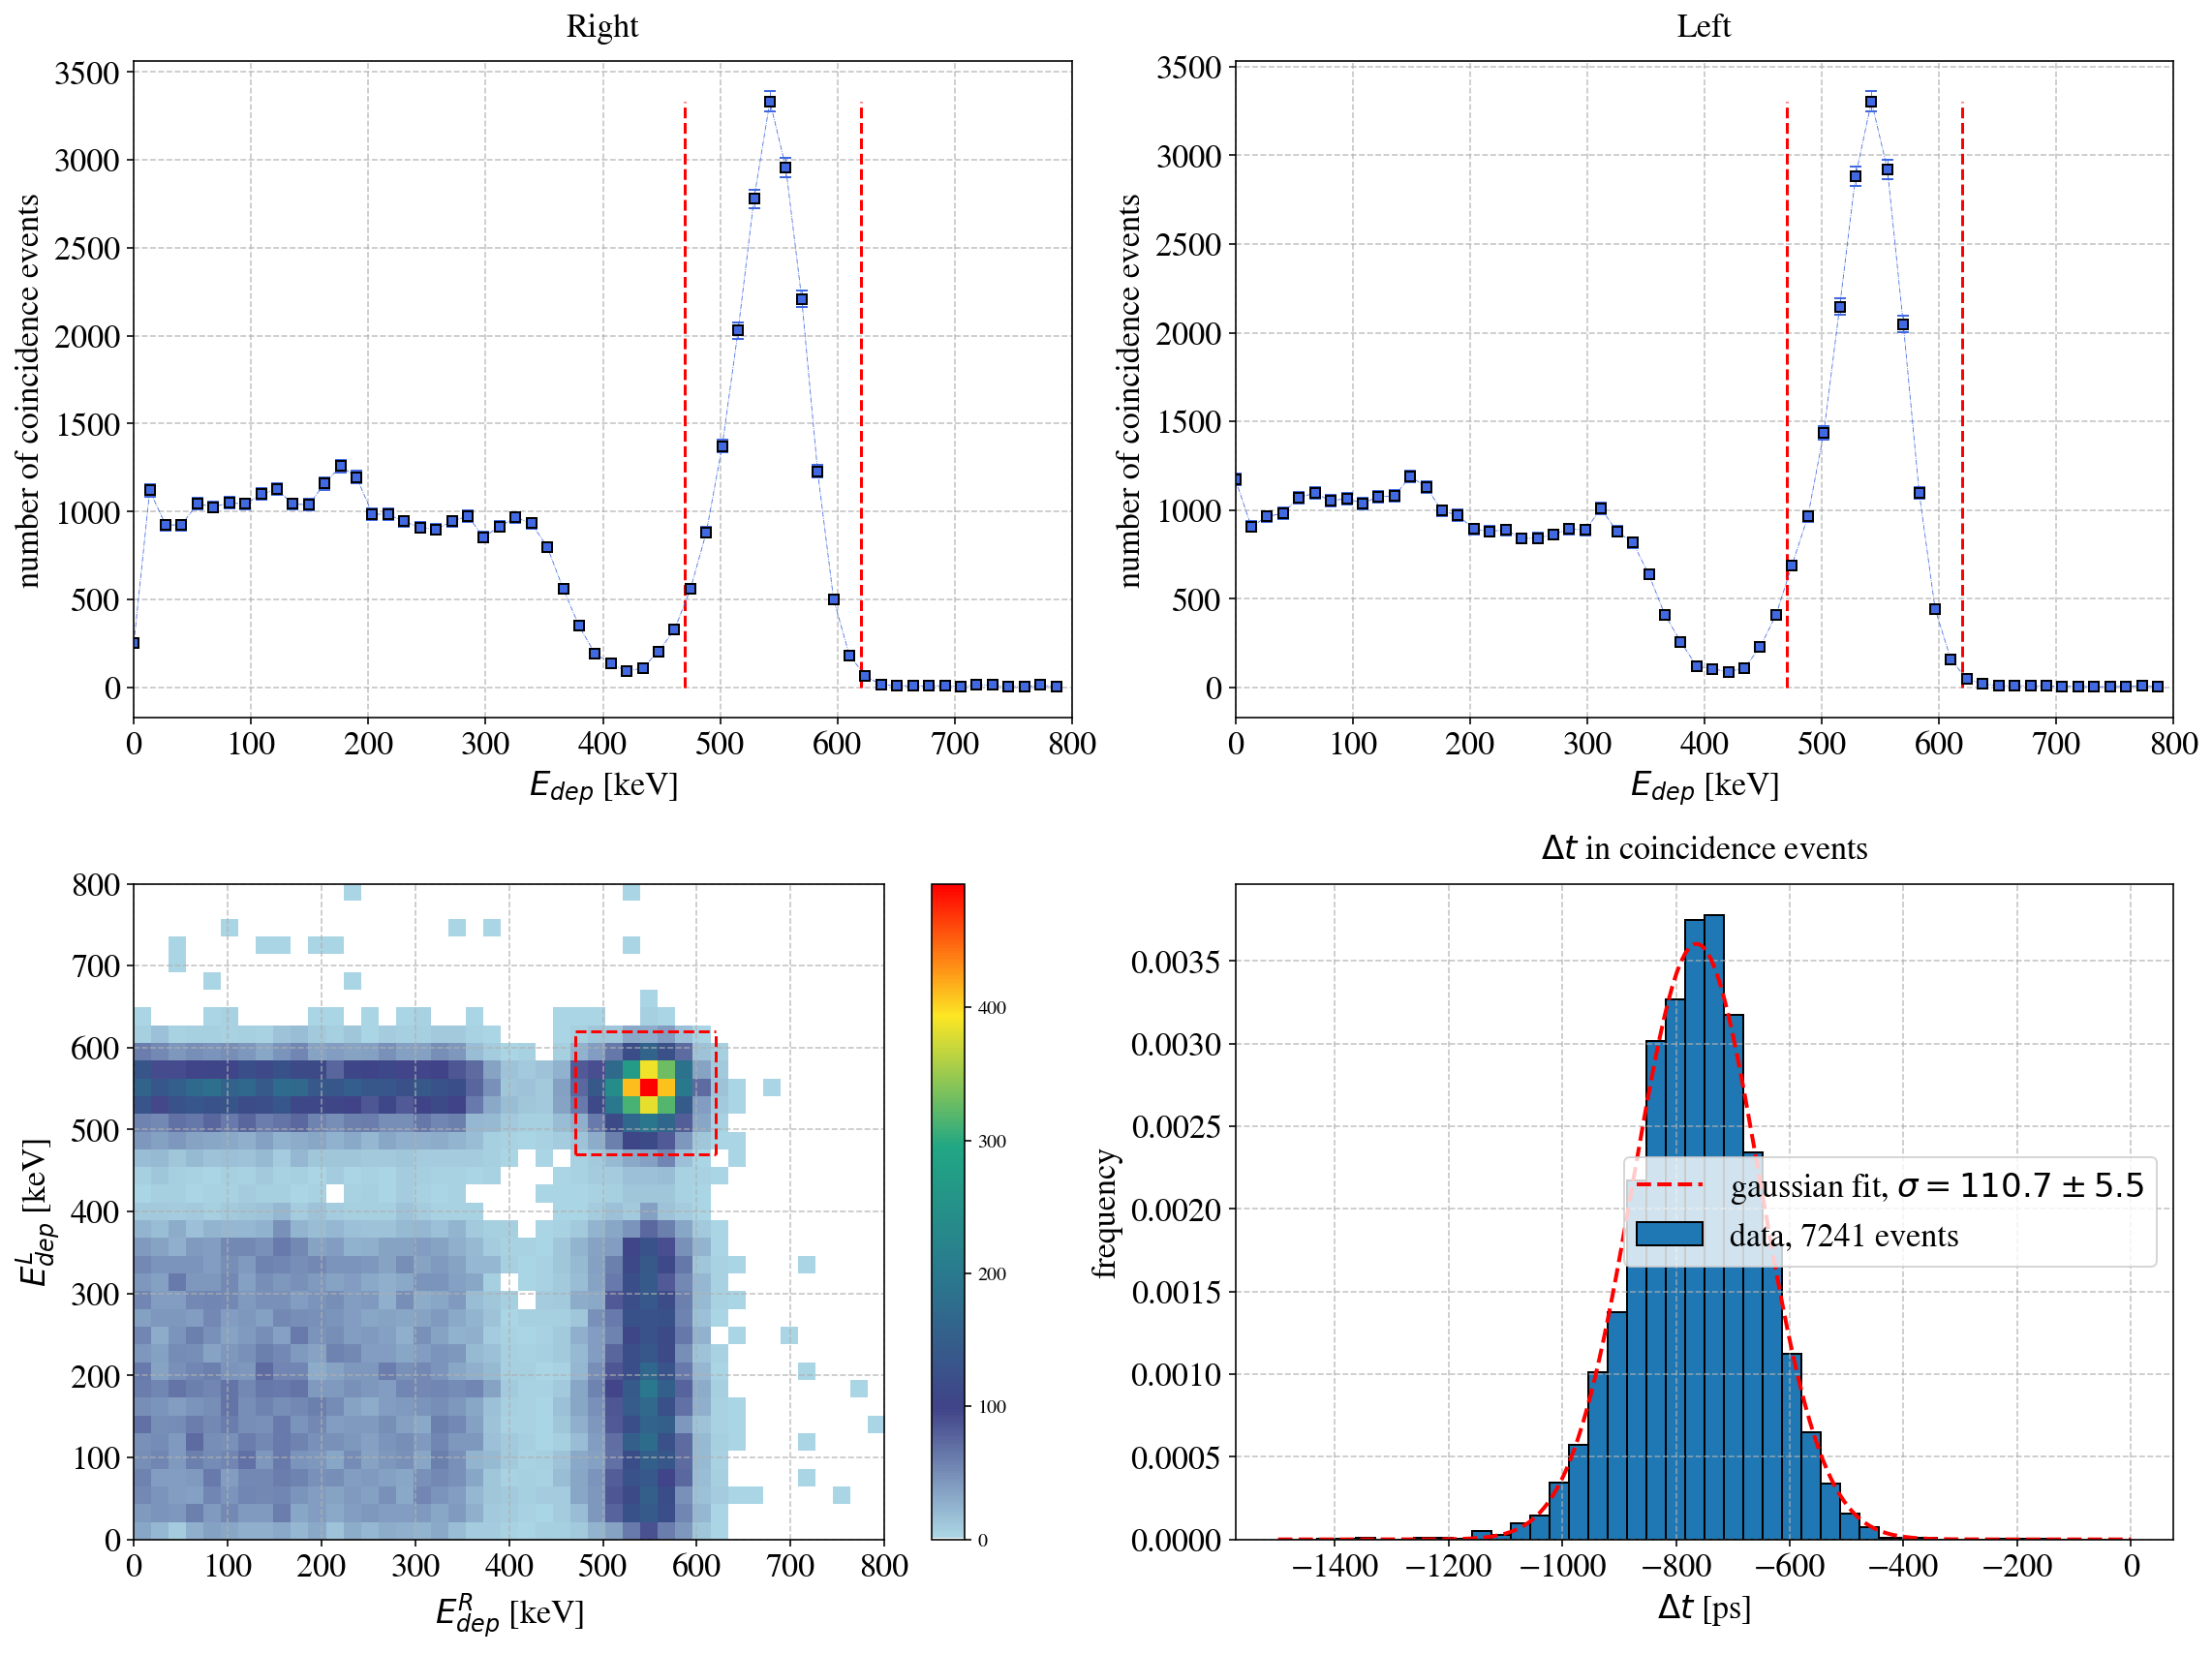

In [47]:

time_difference_in_2SiPM_coincidence_measurement(coinc_data=coinc_10mm_from_source,                                                      
                                                 bins=np.linspace(0,800,60),Epoly=Epoly,
                                                 channelIdcs=[2,1],
                                                 Edeplims_keV=(470,620),dt_lims=(-1.5e3,0.5e3),
                                                 dt_bins=np.linspace(-1.5e3,0,45))
save_figure(filename = main_figures_path + 'p1_10mm_from_source_22Na_coincidence_ADCcut_511photopeak_both_sides.pdf')

# $^{60}$Co - two detectors on both sides and 10 mm away from source

In [24]:
dT_Co60 = 118599.0 # sec
filename = ('/Users/erezcohen/Desktop/data/PETsys/Prototype1/Co60_source_1.8uC_16Dec2020/'+
            'Co60_%d_sec_coinc.dat'%dT_Co60)
coinc_Co60_10mm_from_source = pd.read_csv(filename,delimiter='\t',
                                     names=['mh-n1','mh-j1','t1','Q1','ch1','mh-n2','mh-j2','t2','Q2','ch2'])

print('done reading data for two detectors 10 mm from source.')

done reading data for two detectors 10 mm from source.


30529 events in coincidence window and Edep limits
26825 events fitting to Gaussian
mu: -690.9797204100653 ,sigma: 716.4667362258315
saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1/Figures/p1_10mm_from_source_Co60_coincidence_noADCcut.pdf


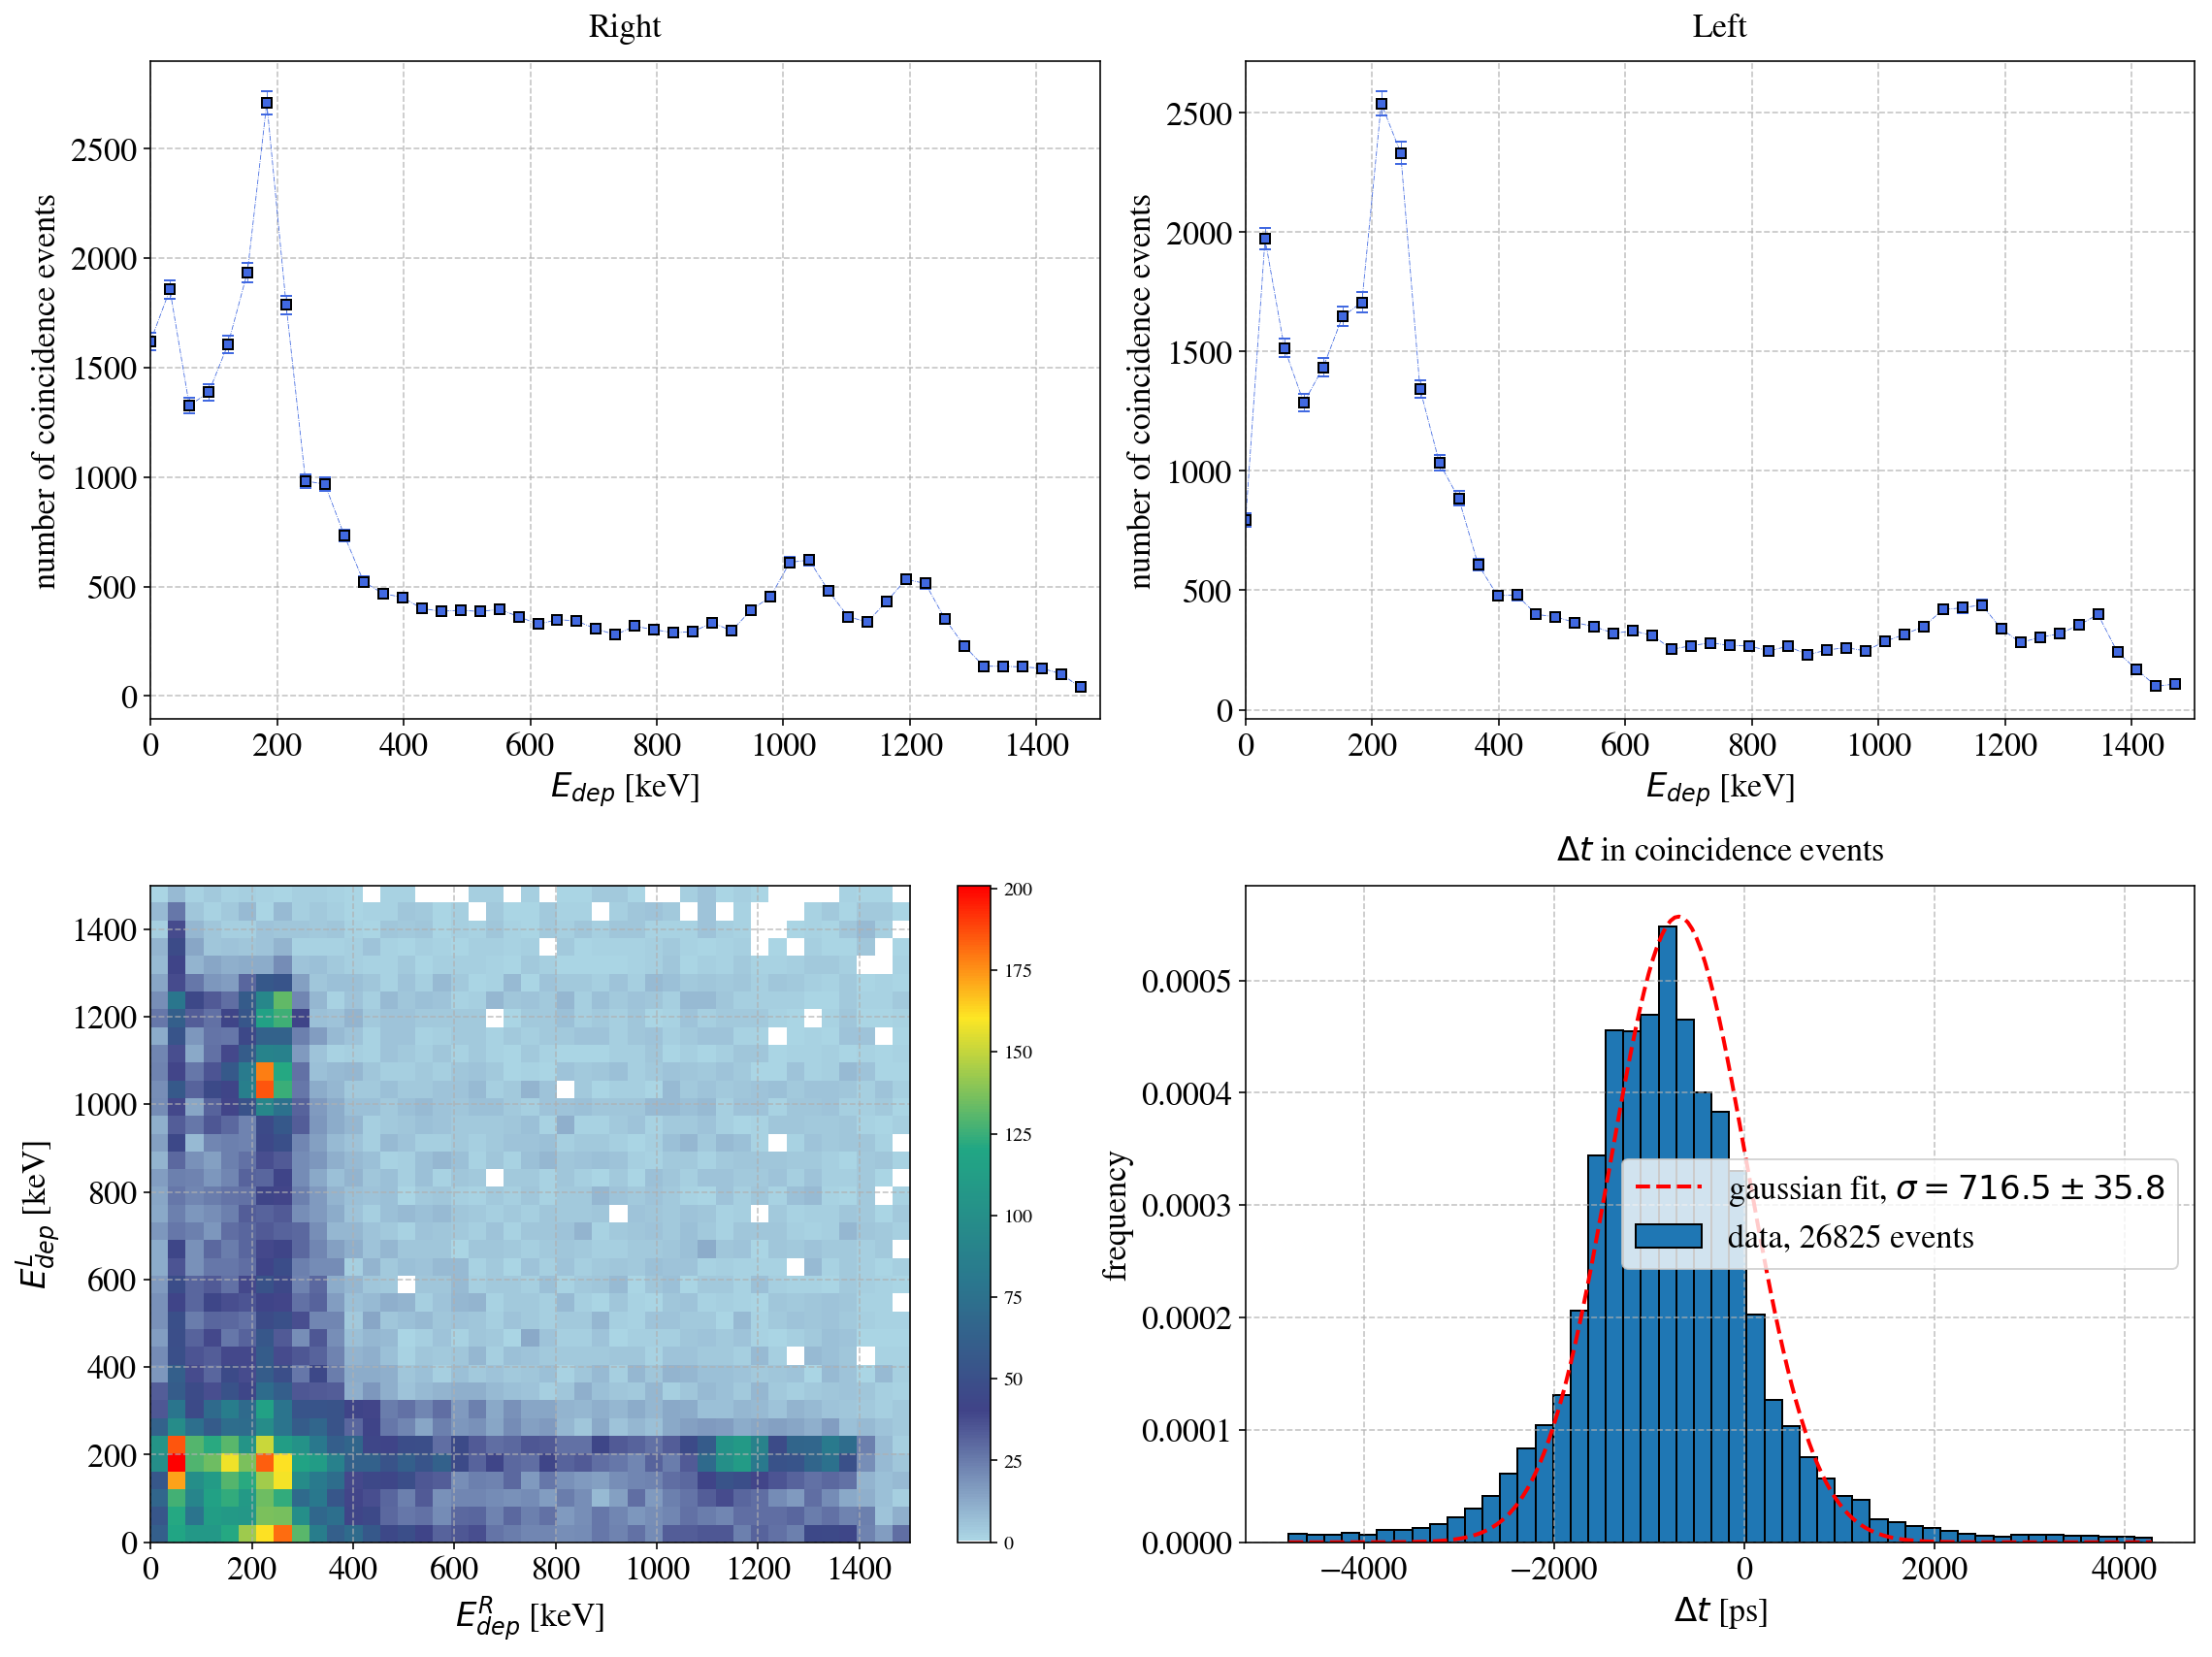

In [25]:
time_difference_in_2SiPM_coincidence_measurement(coinc_data=coinc_Co60_10mm_from_source,Epoly=Epoly,
                                                 channels=[533,482],
                                                 calibration_channels=[533,482],
                                                 bins=np.linspace(0,1500,50))
save_figure(filename = main_figures_path + 'p1_10mm_from_source_Co60_coincidence_noADCcut.pdf')

1802 events in coincidence window and Edep limits
1746 events fitting to Gaussian
mu: -1447.840778923253 ,sigma: 189.8920953263577
saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1/Figures/p1_10mm_from_source_Co60_coincidence_ADCcut_1100_200.pdf


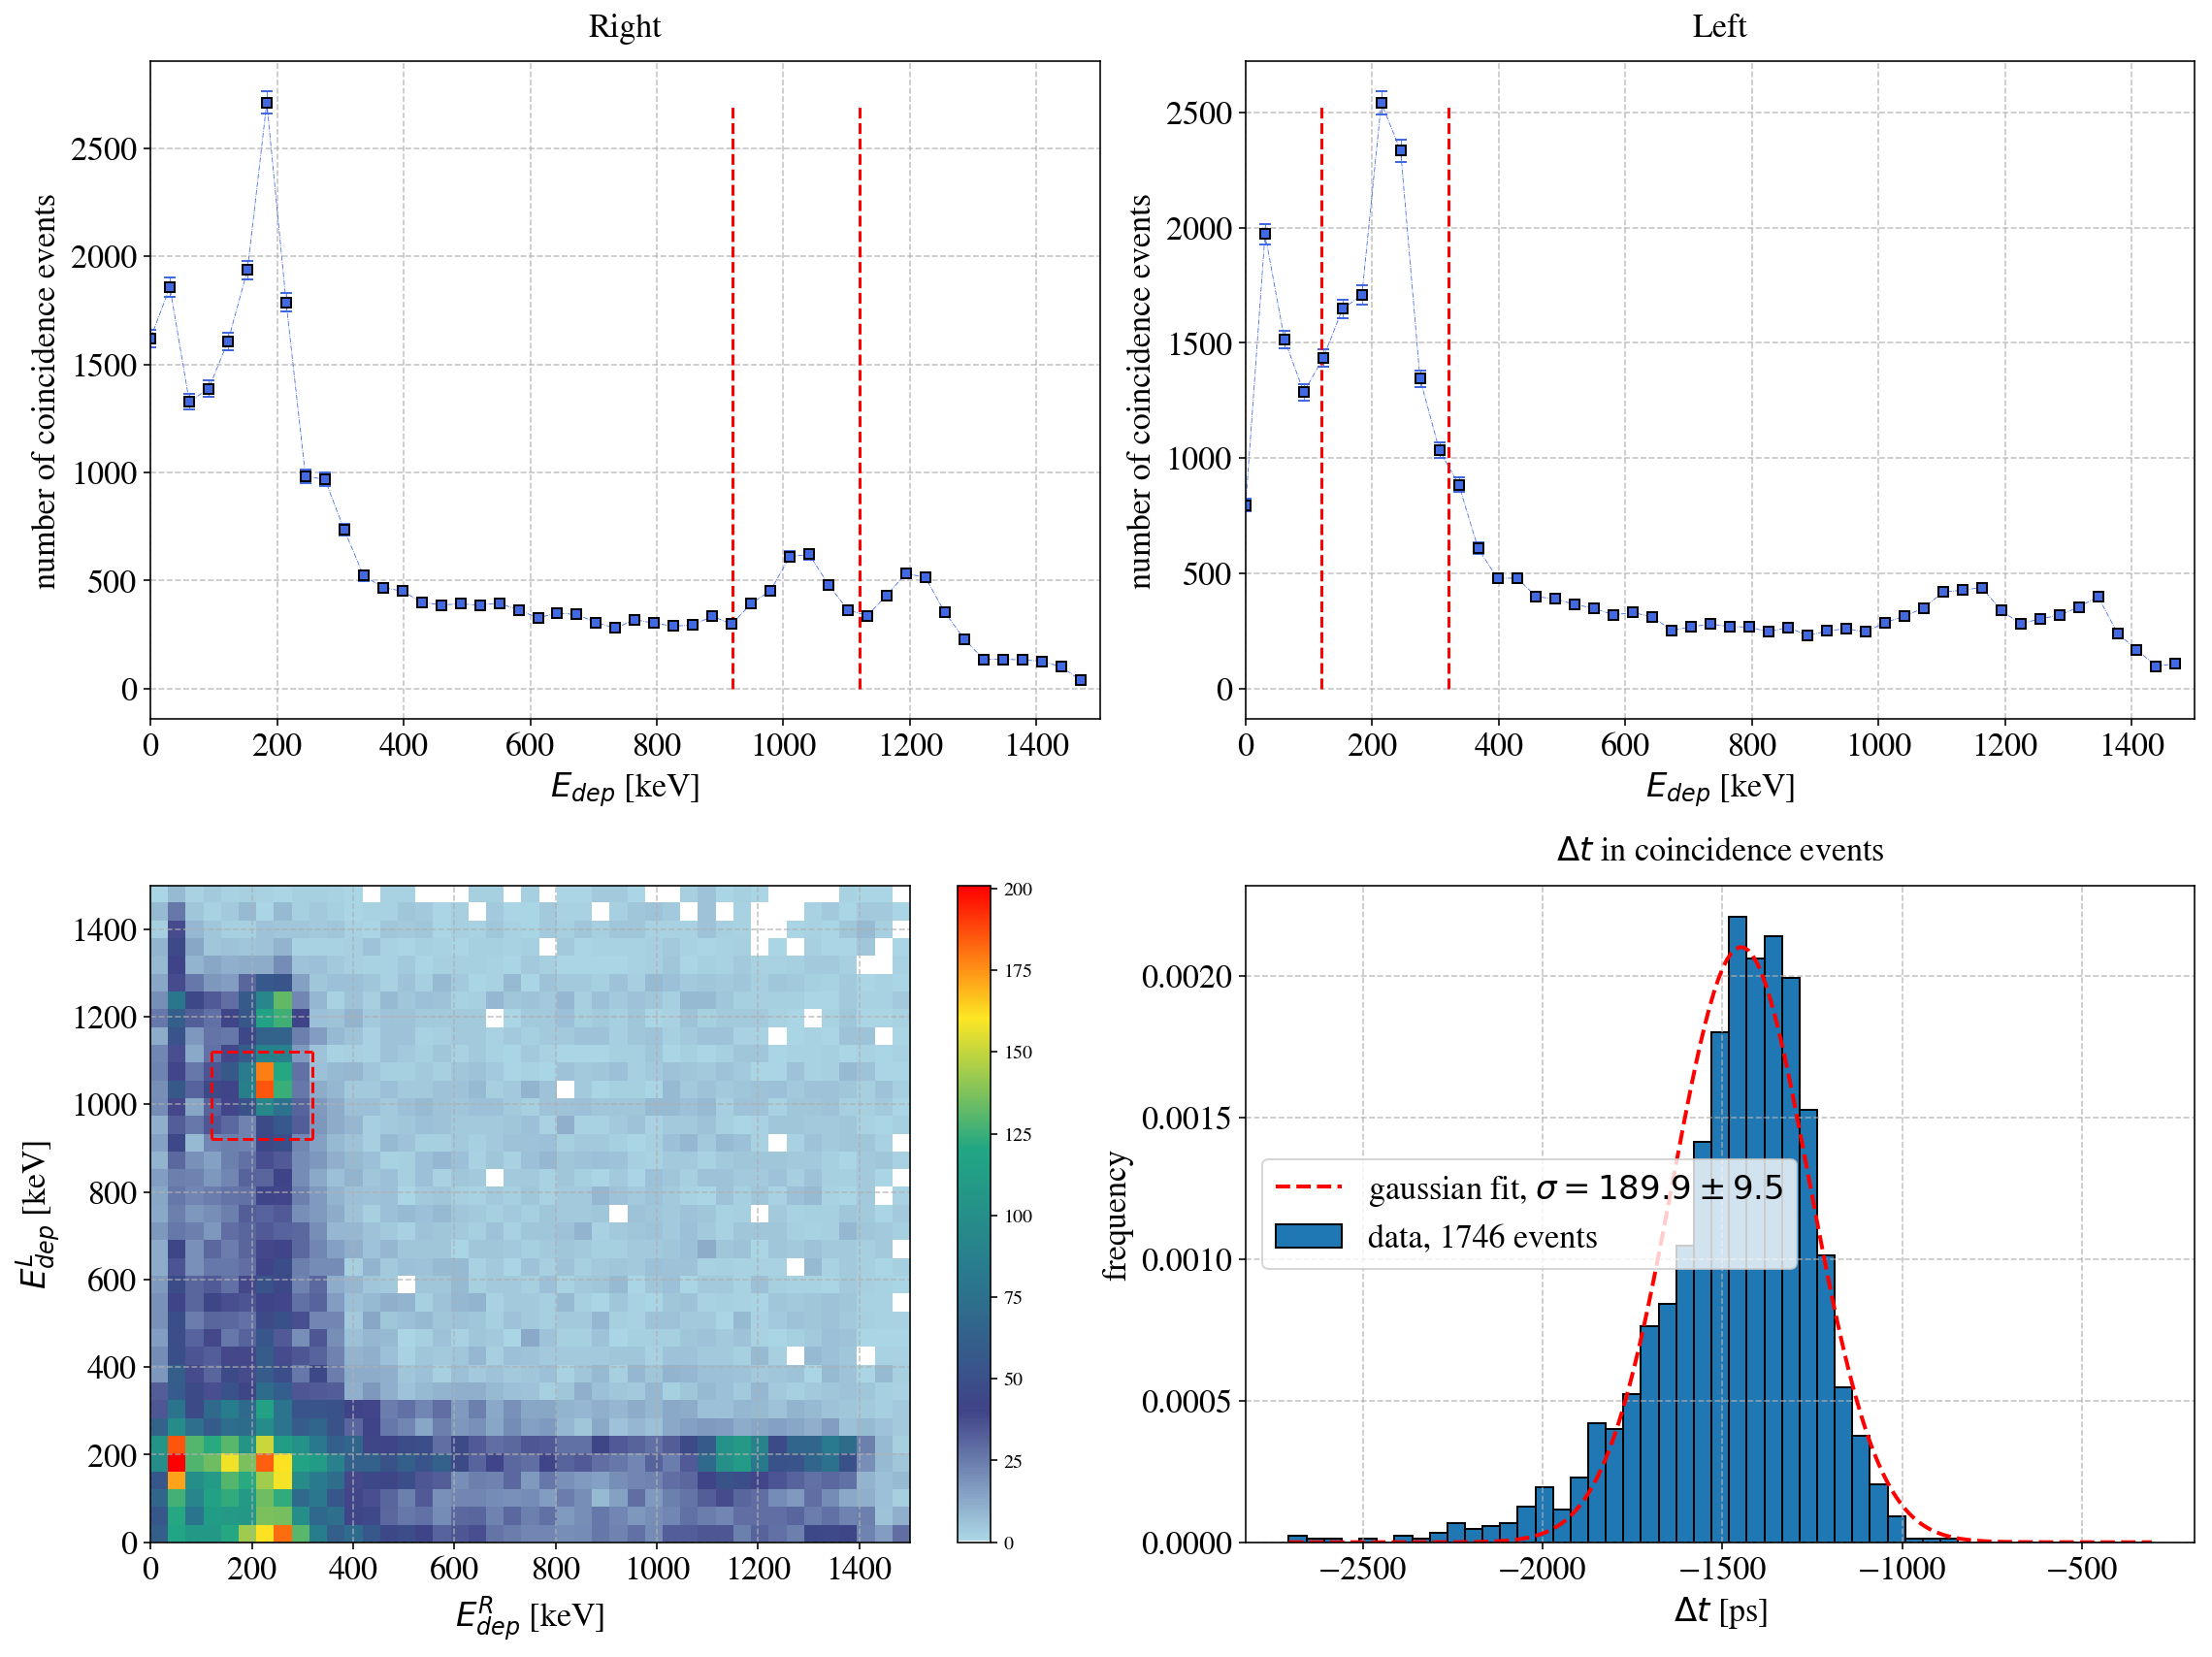

In [31]:
time_difference_in_2SiPM_coincidence_measurement(coinc_data=coinc_Co60_10mm_from_source,Epoly=Epoly,
                                                 channels=[533,482],
                                                 calibration_channels=[533,482],
                                                 bins=np.linspace(0,1500,50),
                                                 Edeplims_keV=(120,320,920,1120),
                                                 dt_lims=(-2e3,0.e3),)
save_figure(filename = main_figures_path + 'p1_10mm_from_source_Co60_coincidence_ADCcut_1100_200.pdf')

# $^{252}$Cf
/Users/erezcohen/Desktop/data/PETsys/Prototype1/Cf252_source_1uC_3Dec2020/Cf252_4100sec_coinc.dat

detected events in the following channels:  [482 533]
mu: -562.5880893300248 ,sigma: 784.5903415330006


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


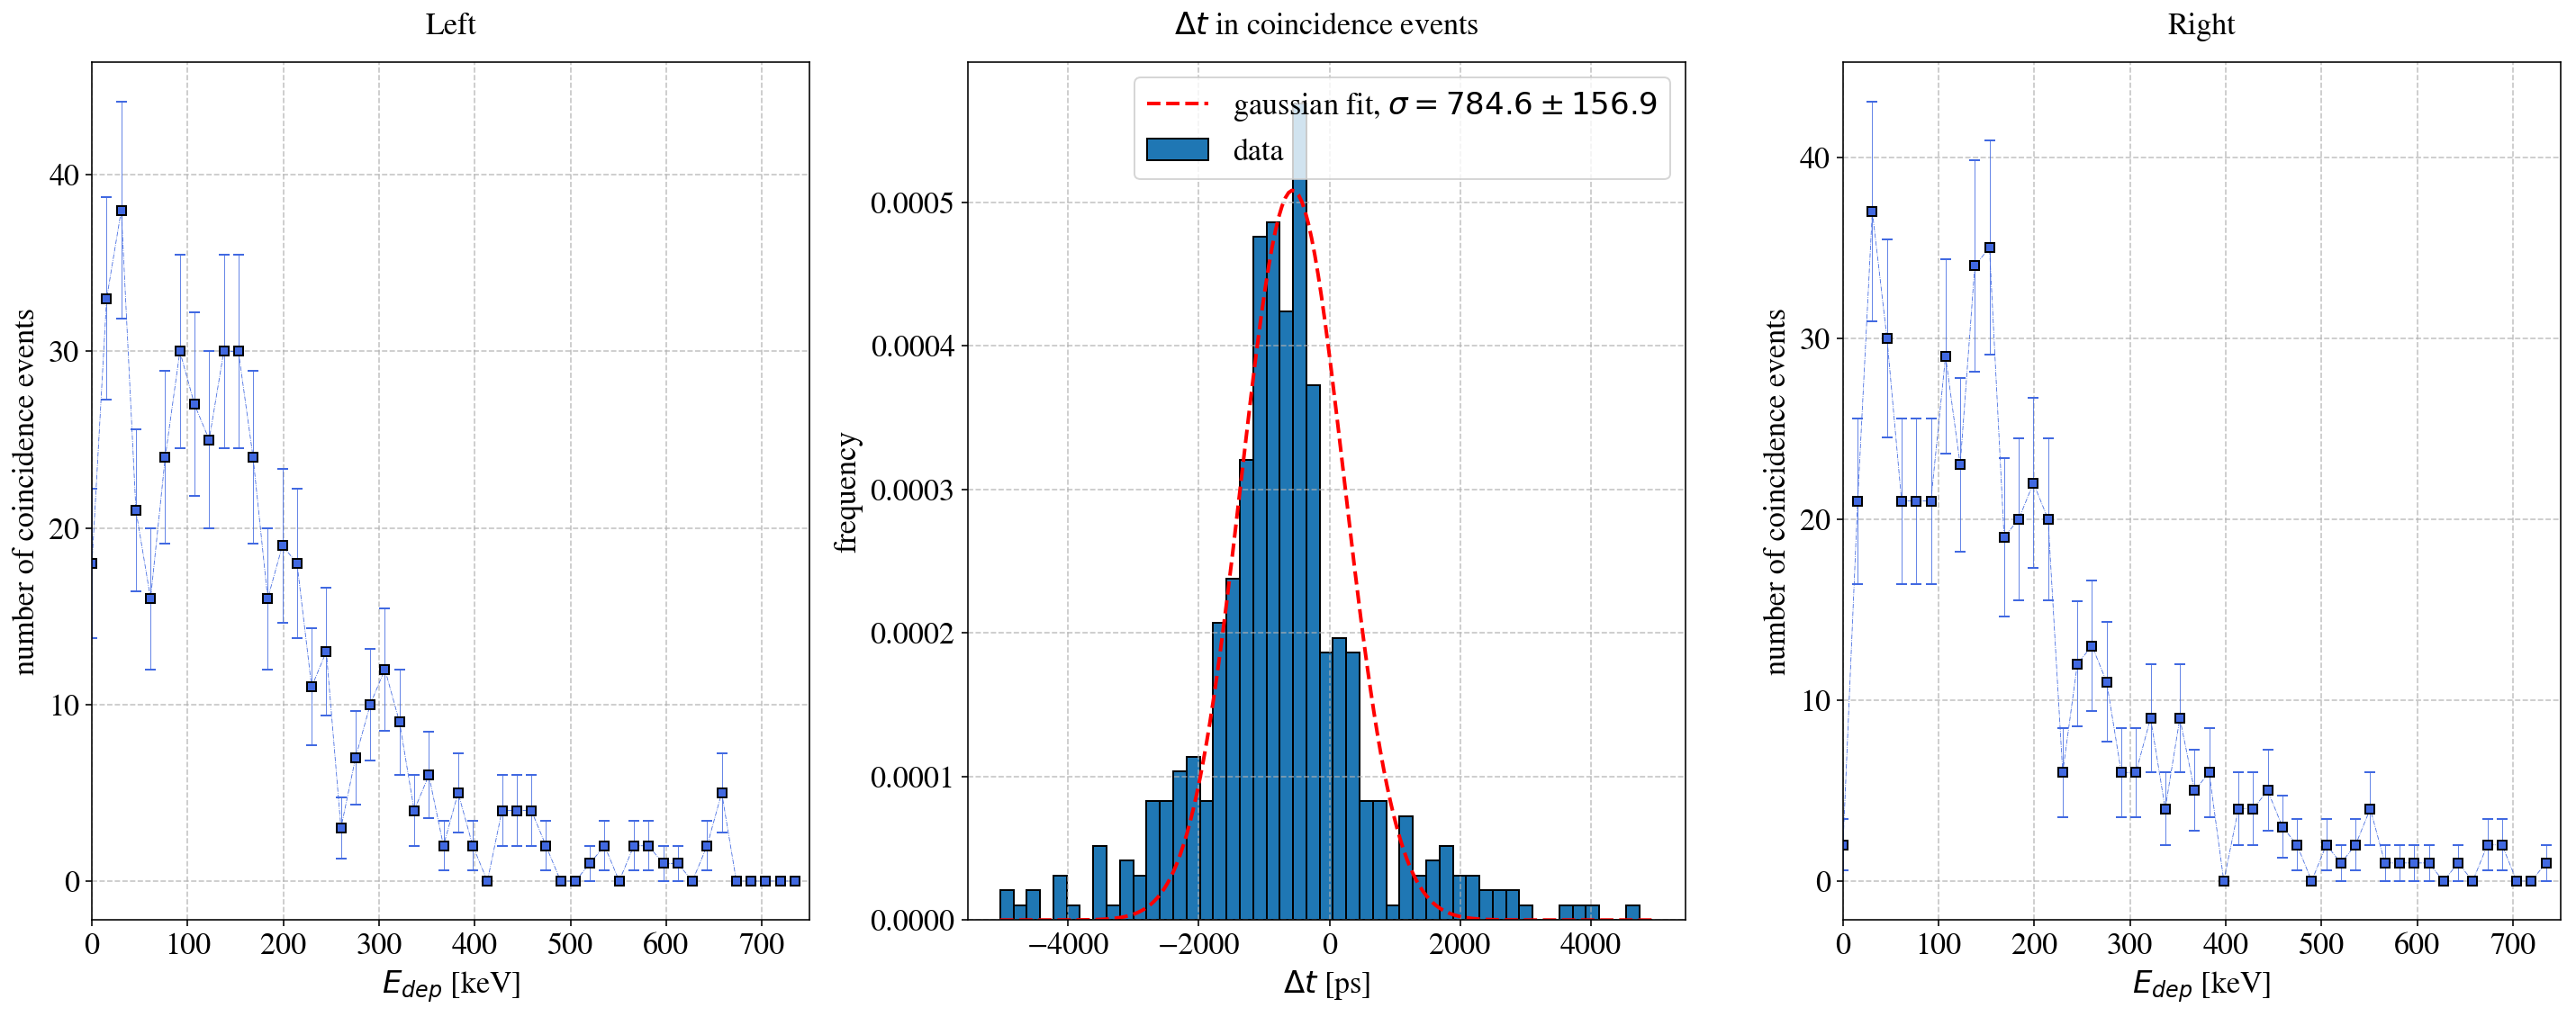

In [74]:
time_difference_in_2SiPM_coincidence_measurement(coinc_data=coinc_data,bins=np.linspace(0,750,50),Edeplims_keV=None)

detected events in the following channels:  [482 533]
mu: -769.96875 ,sigma: 657.2888357539407


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


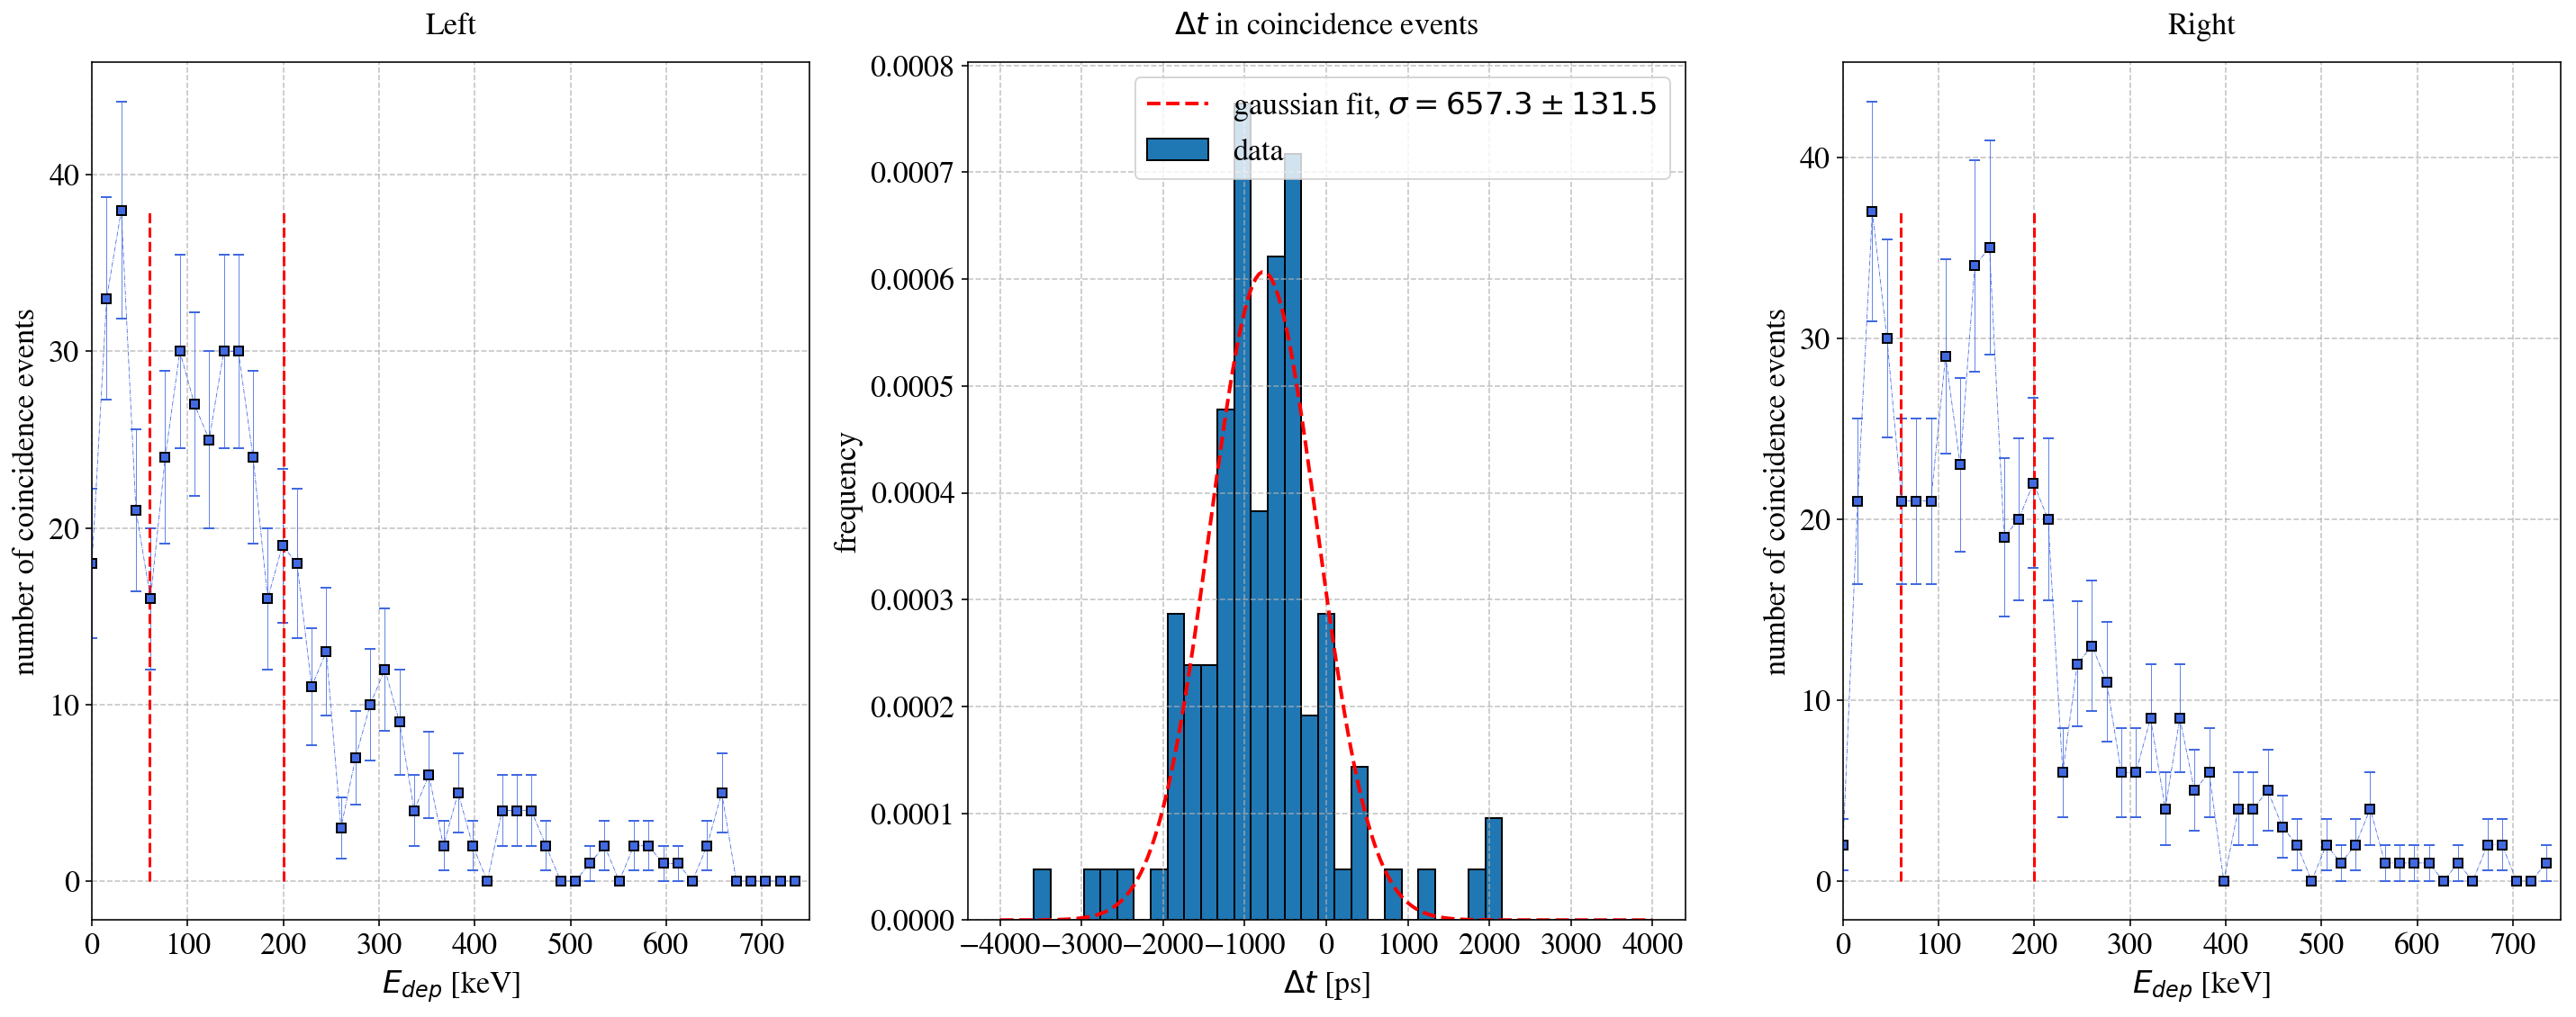

In [76]:
time_difference_in_2SiPM_coincidence_measurement(coinc_data=coinc_data,bins=np.linspace(0,750,50),
                                                 Edeplims_keV=(60,200),dt_lims=(-2e3,2e3),dt_bins=np.linspace(-4e3,4e3,40))